In [78]:
import pandas as pd
stock_df = pd.read_csv('stockdata.csv')
economic_df = pd.read_csv('otherdata.csv')
stock_df['Date'] = pd.to_datetime(stock_df['Date']) 
stock_df.head()

Company  Previous Close   Open   High    Low  Close  Change     Volume  \
0   ABCTRANS            0.36   0.37   0.37   0.37   0.37    0.00    165,000   
1     ACCESS           13.00  13.00  13.05  12.95  12.95    0.15  3,995,077   
2  AFRINSURE            0.38   0.37   0.37   0.37   0.37   -0.01    101,000   
3   AFRIPRUD            4.74   4.70   4.92    4.7   4.92    0.05  3,924,758   
4   AGLEVENT            0.57   0.57   0.57   0.57   0.57    0.00     60,884   

        Value(N)       Date  
0      61,050.00 2018-01-02  
1  51,938,580.00 2018-01-02  
2      37,370.00 2018-01-02  
3  18,966,710.00 2018-01-02  
4      35,737.88 2018-01-02

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display

# Function to plot average monthly closing prices based on selected company, considering each year separately
def plot_avg_closing_price(company_name):
    # Filter data for the selected company
    company_data = stock_df[stock_df['Company'] == company_name]
    
    # Ensure the data is sorted by date
    company_data = company_data.sort_values('Date')
    
    # Set 'Date' column as the DataFrame index
    company_data.set_index('Date', inplace=True)
    
    # Resample by month and year, calculating the average closing price for each month in each year
    monthly_avg = company_data['Close'].resample('M').mean()
    
    # Plotting the monthly average closing price over time
    plt.figure(figsize=(10,6))
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', label=f'Average Monthly Closing Price of {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Average Monthly Closing Price')
    plt.title(f'Time Series of Average Monthly Closing Price for {company_name}')
    
    # Format the x-axis to show months and years clearly
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis to show 'Month Year'
    
    # Adjust font size of the x-axis labels
    plt.xticks(rotation=45, fontsize=5)  # Set font size to 8 (smaller) to avoid overlapping
    
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create a dropdown widget to select a company
company_dropdown = widgets.Dropdown(
    options=stock_df['Company'].unique(),
    description='Company:',
    value=stock_df['Company'].unique()[0],  # default to first company
)

# Create an interactive plot that updates when the dropdown value changes
interactive_plot = widgets.interactive(plot_avg_closing_price, company_name=company_dropdown)

# Display the dropdown and the plot
display(interactive_plot)


interactive(children=(Dropdown(description='Company:', options=('ABCTRANS', 'ACCESS', 'AFRINSURE', 'AFRIPRUD',…

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/2882007844.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_market = stock_df.groupby('Date')['Close'].mean().resample('M').mean()


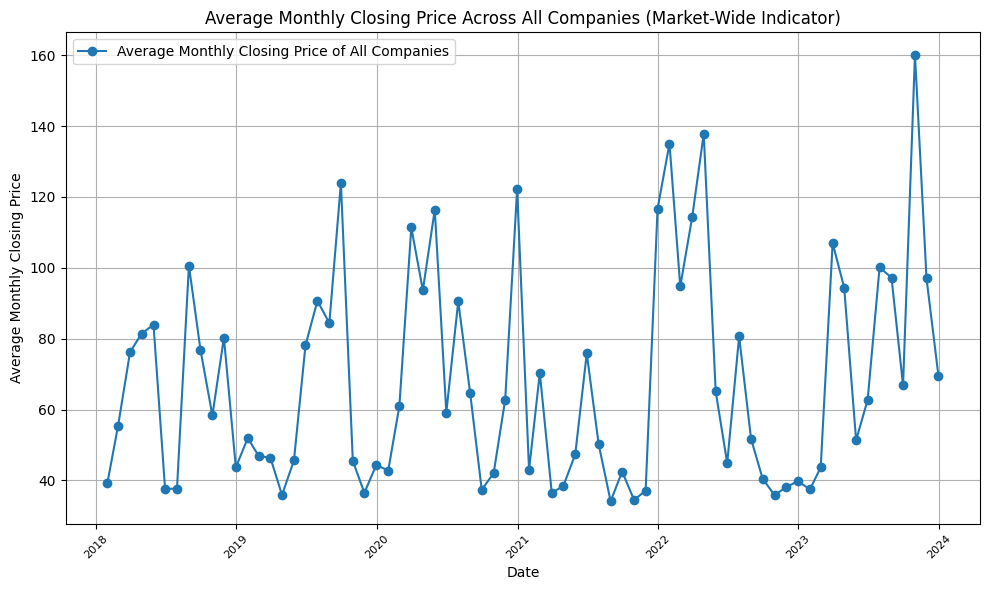

In [81]:
# Resample by month and calculate the average closing price across all companies
monthly_avg_market = stock_df.groupby('Date')['Close'].mean().resample('M').mean()

# Plot the monthly average closing price to represent the market
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_market.index, monthly_avg_market.values, marker='o', linestyle='-', label='Average Monthly Closing Price of All Companies')
plt.xlabel('Date')
plt.ylabel('Average Monthly Closing Price')
plt.title('Average Monthly Closing Price Across All Companies (Market-Wide Indicator)')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

stock_price_data = pd.read_csv('/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/stockdata.csv')
stock_price_data['Company'] = stock_price_data['Company'].str.strip().str.upper()
for column in ['Volume', 'Value(N)']:
    stock_price_data[column] = stock_price_data[column].replace({',': ''}, regex=True)
    stock_price_data[column] = stock_price_data[column].astype(float)
stock_columns = ['Previous Close', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'Value(N)']

sample_company = stock_price_data['Company'].unique()[0]
company_data = stock_price_data[stock_price_data['Company'] == sample_company]

In [34]:
print(f"Data for company: {sample_company}")
print(company_data.head())  

Data for company: ABCTRANS
      Company  Previous Close  Open  High   Low  Close  Change    Volume  \
0    ABCTRANS            0.36  0.37  0.37  0.37   0.37    0.00  165000.0   
112  ABCTRANS            0.37  0.37  0.37  0.37   0.37    0.00   28400.0   
223  ABCTRANS            0.37  0.37  0.37  0.37   0.37    0.00   60450.0   
332  ABCTRANS            0.37  0.38  0.38  0.38   0.38    0.01  647150.0   
430  ABCTRANS            0.38  0.39  0.39  0.39   0.39    0.01  268922.0   

     Value(N)      Date  
0     61050.0  1/2/2018  
112   10792.0  1/3/2018  
223   22971.0  1/4/2018  
332  246417.5  1/5/2018  
430  104879.6  1/8/2018  


In [35]:

print(stock_price_data['Company'].value_counts())

Company
FIDELITYBK    1467
CADBURY       1467
GLAXOSMITH    1466
AFRIPRUD      1465
AIICO         1465
              ... 
FGS202417        1
FGS202634        1
FGS202636        1
FGS202036        1
FGS202421        1
Name: count, Length: 334, dtype: int64


In [36]:
stock_price_data.head()

Company  Previous Close   Open   High    Low  Close  Change     Volume  \
0   ABCTRANS            0.36   0.37   0.37   0.37   0.37    0.00   165000.0   
1     ACCESS           13.00  13.00  13.05  12.95  12.95    0.15  3995077.0   
2  AFRINSURE            0.38   0.37   0.37   0.37   0.37   -0.01   101000.0   
3   AFRIPRUD            4.74   4.70   4.92    4.7   4.92    0.05  3924758.0   
4   AGLEVENT            0.57   0.57   0.57   0.57   0.57    0.00    60884.0   

      Value(N)      Date  
0     61050.00  1/2/2018  
1  51938580.00  1/2/2018  
2     37370.00  1/2/2018  
3  18966710.00  1/2/2018  
4     35737.88  1/2/2018

## MPT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Load the CSV file
stock_price_data = pd.read_csv('/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/stockdata.csv')

# Standardize the 'Company' column to avoid filtering issues
stock_price_data['Company'] = stock_price_data['Company'].str.strip().str.upper()

# Define the columns for stock prices
stock_columns = ['Previous Close', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'Value(N)']

# Clean numeric data by removing problematic rows
for column in stock_columns:
    if stock_price_data[column].dtype == 'object':
        stock_price_data = stock_price_data[~stock_price_data[column].str.contains('%', na=False)]
        stock_price_data = stock_price_data[~stock_price_data[column].str.contains('[A-Za-z]', na=False)]
        stock_price_data[column] = stock_price_data[column].replace({',': ''}, regex=True)

# Convert cleaned data to float
for column in stock_columns:
    stock_price_data[column] = stock_price_data[column].astype(float)

# Dictionary to store predicted returns and loss history for each company
predicted_returns_dict = {}
loss_history_dict = {}

for company in stock_price_data['Company'].unique():
    # Filter data for the current company
    company_data = stock_price_data[stock_price_data['Company'] == company]
    
    if not company_data.empty:
        # Scale stock prices
        scaler_stock = MinMaxScaler()
        scaled_stock_data = scaler_stock.fit_transform(company_data[stock_columns])

        # Prepare the data for LSTM
        def create_dataset(data, target, time_step=1):
            X, Y = [], []
            for i in range(len(data) - time_step - 20):  
                X.append(data[i:(i + time_step), :])
                Y.append(target[i + time_step:i + time_step + 20, :]) 
            return np.array(X), np.array(Y)

        time_step = 10
        X, Y = create_dataset(scaled_stock_data, scaled_stock_data, time_step)

        # Check if we have enough data
        if X.shape[0] < 1 or X.shape[1] < time_step:
            print(f"Skipping company {company} due to insufficient data.")
            continue

        # Splitting the data into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        Y_train, Y_test = Y[:train_size], Y[train_size:]

        # Debugging: Print the shapes
        print(f"{company}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

        # Reshape input to be [samples, time steps, features] which is required for LSTM
        if X_train.ndim == 3:
            X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
            X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])
        else:
            print(f"Skipping company {company} due to unexpected X_train shape.")
            continue

        # Create the LSTM model
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
        model.add(LSTM(50, return_sequences=False))
        model.add(RepeatVector(20))  # Repeat the output for the 20 days ahead
        model.add(LSTM(50, return_sequences=True))
        model.add(TimeDistributed(Dense(Y_train.shape[2])))  # Ensure output is shaped for each of the 20 days

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the LSTM model and save the training history
        history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose=1)

        # Store the loss history
        loss_history_dict[company] = history.history

        # Predicting and inverse transforming the results
        test_predict = model.predict(X_test)

        # Inverse scaling the entire prediction array to match original scale dimensions
        test_predict = scaler_stock.inverse_transform(test_predict.reshape(-1, len(stock_columns)))

        # Extract the 'Close' price predictions (assuming 'Close' is at index 4)
        predicted_closing_prices = test_predict[:, 4]

        # Calculate daily returns from the predicted closing prices
        predicted_returns = np.diff(predicted_closing_prices) / predicted_closing_prices[:-1]

        # Store the predicted returns in a dictionary
        predicted_returns_dict[company] = predicted_returns

# Make all lists in the dictionary the same length by padding with NaN
max_length = max(len(v) for v in predicted_returns_dict.values())
for key in predicted_returns_dict:
    length = len(predicted_returns_dict[key])
    if length < max_length:
        predicted_returns_dict[key] = np.pad(predicted_returns_dict[key], (0, max_length - length), 'constant', constant_values=np.nan)

# Convert the dictionary to a DataFrame
predicted_returns_df = pd.DataFrame(predicted_returns_dict)

# Print the predicted returns DataFrame
print(predicted_returns_df.head())

# Plotting loss for each company
for company, history in loss_history_dict.items():
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {company}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [37]:
# Define the columns for stock prices
stock_columns = ['Previous Close', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'Value(N)']

# Clean numeric data by removing problematic rows
for column in stock_columns:
    # Ensure that there are no percentage signs, commas, or alphabetic characters
    stock_price_data[column] = stock_price_data[column].replace({',': ''}, regex=True)
    stock_price_data[column] = stock_price_data[column].replace({'%': ''}, regex=True)
    stock_price_data[column] = stock_price_data[column].replace(r'[A-Za-z]', '', regex=True)

    # Convert to float (errors='coerce' will turn invalid parsing into NaN)
    stock_price_data[column] = pd.to_numeric(stock_price_data[column], errors='coerce')

# Drop any rows where the numeric columns still have NaN after the cleaning
stock_price_data = stock_price_data.dropna(subset=stock_columns)

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Pad all arrays in a dictionary to the same length
def pad_dict_arrays(dict_data):
    # Find the maximum length of any array in the dictionary
    max_len = max([len(v) for v in dict_data.values()])
    
    # Pad each array with NaN values to make them the same length
    for key in dict_data:
        if len(dict_data[key]) < max_len:
            dict_data[key] = np.pad(dict_data[key], (0, max_len - len(dict_data[key])), 'constant', constant_values=np.nan)
    return dict_data

# Dictionary to store evaluation metrics, loss history, predicted returns, and predicted closing prices
metrics_dict = {}
loss_history_dict = {} 
predicted_returns_dict = {}
predicted_closing_prices_dict = {}

for company in stock_price_data['Company'].unique():
    # Filter data for the current company
    company_data = stock_price_data[stock_price_data['Company'] == company]
    
    if not company_data.empty:
        # Scale stock prices
        scaler_stock = MinMaxScaler()
        scaled_stock_data = scaler_stock.fit_transform(company_data[stock_columns])

        # Prepare the data for LSTM
        def create_dataset(data, target, time_step=1):
            X, Y = [], []
            for i in range(len(data) - time_step - 20):  
                X.append(data[i:(i + time_step), :])
                Y.append(target[i + time_step:i + time_step + 20, :]) 
            return np.array(X), np.array(Y)

        time_step = 10
        X, Y = create_dataset(scaled_stock_data, scaled_stock_data, time_step)

        # Check if we have enough data
        if X.shape[0] < 1 or X.shape[1] < time_step:
            print(f"Skipping company {company} due to insufficient data.")
            continue

        # Splitting the data into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        Y_train, Y_test = Y[:train_size], Y[train_size:]

        # Debugging: Print the shapes
        print(f"{company}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

        # Reshape input to be [samples, time steps, features] which is required for LSTM
        if X_train.ndim == 3:
            X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
            X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])
        else:
            print(f"Skipping company {company} due to unexpected X_train shape.")
            continue

        # Create the LSTM model
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
        model.add(LSTM(50, return_sequences=False))
        model.add(RepeatVector(20))  # Repeat the output for the 20 days ahead
        model.add(LSTM(50, return_sequences=True))
        model.add(TimeDistributed(Dense(Y_train.shape[2])))  # Ensure output is shaped for each of the 20 days

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the LSTM model and save the training history
        history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose=1)

        # Store the loss history
        loss_history_dict[company] = history.history

        # Predicting and inverse transforming the results
        test_predict = model.predict(X_test)

        # Inverse scaling the entire prediction array to match original scale dimensions
        test_predict = scaler_stock.inverse_transform(test_predict.reshape(-1, len(stock_columns)))

        # Extract the 'Close' price predictions (assuming 'Close' is at index 4)
        predicted_closing_prices = test_predict[:, 5]

        # Store the predicted closing prices in a dictionary
        predicted_closing_prices_dict[company] = predicted_closing_prices

        # Get the actual 'Close' price from the test data (also need to inverse transform)
        actual_closing_prices = scaler_stock.inverse_transform(Y_test.reshape(-1, len(stock_columns)))[:, 4]

        # Calculate daily returns from the predicted closing prices
        predicted_returns = np.diff(predicted_closing_prices) / predicted_closing_prices[:-1]

        # Store the predicted returns in a dictionary
        predicted_returns_dict[company] = predicted_returns

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(actual_closing_prices, predicted_closing_prices))
        mae = mean_absolute_error(actual_closing_prices, predicted_closing_prices)
        mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100

        # Store the metrics in the dictionary
        metrics_dict[company] = {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        }

# Pad arrays to ensure all lengths are equal
predicted_closing_prices_dict = pad_dict_arrays(predicted_closing_prices_dict)
predicted_returns_dict = pad_dict_arrays(predicted_returns_dict)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T

# Convert predicted closing prices to DataFrame
predicted_closing_prices_df = pd.DataFrame(predicted_closing_prices_dict)

# Convert predicted returns to DataFrame
predicted_returns_df = pd.DataFrame(predicted_returns_dict)

# Print the metrics DataFrame
print("\nEvaluation Metrics for Each Company:")
print(metrics_df)

# Print the predicted closing prices DataFrame
print("\nPredicted Closing Prices for Each Company:")
print(predicted_closing_prices_df)

# Print the predicted returns DataFrame
print("\nPredicted Returns for Each Company:")
print(predicted_returns_df)


ABCTRANS: X_train shape: (992, 10, 8), X_test shape: (249, 10, 8)
Epoch 1/50


/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - val_loss: 0.0286
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0272
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - val_loss: 0.0267
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0266
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0267
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0260
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0254
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - val_loss: 0.0246
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0258
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0244
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0246
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - val_loss: 0.0250

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0927 - val_loss: 0.0174
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0378 - val_loss: 0.0138
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0342 - val_loss: 0.0136
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - val_loss: 0.0191
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - val_loss: 0.0142
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0119
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - val_loss: 0.0133
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - val_loss: 0.0107
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0115
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0097
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - val_loss: 0.0101
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0098

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0896 - val_loss: 0.0264
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - val_loss: 0.0166
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - val_loss: 0.0182
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - val_loss: 0.0157
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - val_loss: 0.0151
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - val_loss: 0.0134
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - val_loss: 0.0142
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.0139
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0140
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0126
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - val_loss: 0.0127
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - val_loss: 0.0150

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1183 - val_loss: 0.0468
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 - val_loss: 0.0408
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0385
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - val_loss: 0.0373
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - val_loss: 0.0369
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - val_loss: 0.0362
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - val_loss: 0.0362
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - val_loss: 0.0350
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - val_loss: 0.0366
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - val_loss: 0.0352
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - val_loss: 0.0361
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - val_loss: 0.0355

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1521 - val_loss: 0.0552
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0626 - val_loss: 0.0310
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - val_loss: 0.0361
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - val_loss: 0.0335
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - val_loss: 0.0315
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - val_loss: 0.0368
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - val_loss: 0.0301
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - val_loss: 0.0364
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - val_loss: 0.0258
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - val_loss: 0.0317
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - val_loss: 0.0303
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - val_loss: 0.0415

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0594 - val_loss: 0.0210
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - val_loss: 0.0180
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - val_loss: 0.0173
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - val_loss: 0.0164
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - val_loss: 0.0152
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - val_loss: 0.0150
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0147
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - val_loss: 0.0143
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0141
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0133

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1804 - val_loss: 0.1184
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0802 - val_loss: 0.0491
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - val_loss: 0.0473
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - val_loss: 0.0457
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - val_loss: 0.0374
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0398 - val_loss: 0.0346
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - val_loss: 0.0357
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - val_loss: 0.0365
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - val_loss: 0.0318
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0347 - val_loss: 0.0340
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0362 - val_loss: 0.0298
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - val_loss: 0.0316
Epoch 13/50
6/6 ━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0989 - val_loss: 0.0414
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - val_loss: 0.0361
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0260 - val_loss: 0.0346
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - val_loss: 0.0351
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0337
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - val_loss: 0.0339
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0343
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0337
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - val_loss: 0.0341
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - val_loss: 0.0325
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - val_loss: 0.0326
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - val_loss: 0.0328

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1512 - val_loss: 0.0361
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 - val_loss: 0.0337
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - val_loss: 0.0347
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - val_loss: 0.0303
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0279
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - val_loss: 0.0294
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - val_loss: 0.0292
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - val_loss: 0.0306
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0273
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - val_loss: 0.0279
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - val_loss: 0.0267
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0280

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1064 - val_loss: 0.0437
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - val_loss: 0.0381
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - val_loss: 0.0361
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - val_loss: 0.0350
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - val_loss: 0.0335
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - val_loss: 0.0352
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - val_loss: 0.0329
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - val_loss: 0.0299
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - val_loss: 0.0303
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - val_loss: 0.0292
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0280
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0265

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0956 - val_loss: 0.0321
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0284
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0266
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - val_loss: 0.0262
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - val_loss: 0.0263
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - val_loss: 0.0257
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.0256
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 0.0246
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0246
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0242
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.0247
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - val_loss: 0.0235

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0950 - val_loss: 0.0277
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - val_loss: 0.0233
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - val_loss: 0.0274
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.0184
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 - val_loss: 0.0212
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - val_loss: 0.0222
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0196
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - val_loss: 0.0193
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0308 - val_loss: 0.0239
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0241
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0196
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0218

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3176 - val_loss: 0.1038
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1049 - val_loss: 0.1004
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0835 - val_loss: 0.0744
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - val_loss: 0.0728
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697 - val_loss: 0.0714
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - val_loss: 0.0678
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - val_loss: 0.0672
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0623 - val_loss: 0.0656
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - val_loss: 0.0649
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - val_loss: 0.0645
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - val_loss: 0.0642
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - val_loss: 0.0652

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1217 - val_loss: 0.0346
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0324
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - val_loss: 0.0295
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - val_loss: 0.0291
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0257
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - val_loss: 0.0248
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - val_loss: 0.0275
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - val_loss: 0.0243
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0232
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0239
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - val_loss: 0.0239
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0257

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1551 - val_loss: 0.0572
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - val_loss: 0.0406
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - val_loss: 0.0327
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - val_loss: 0.0285
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - val_loss: 0.0271
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0257
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0257
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - val_loss: 0.0246
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - val_loss: 0.0226
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - val_loss: 0.0227
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - val_loss: 0.0224
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - val_loss: 0.0231

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0638 - val_loss: 0.0338
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - val_loss: 0.0308
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0303
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0293
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - val_loss: 0.0295
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0286
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - val_loss: 0.0282
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0287
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0287
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - val_loss: 0.0274
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0281
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0273

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0307 - val_loss: 0.0326
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - val_loss: 0.0325
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - val_loss: 0.0302
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0298
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - val_loss: 0.0312
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0281
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0249
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0250
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - val_loss: 0.0267
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0274
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0234
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0232

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1185 - val_loss: 0.0350
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - val_loss: 0.0309
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - val_loss: 0.0290
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - val_loss: 0.0293
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - val_loss: 0.0290
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - val_loss: 0.0305
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - val_loss: 0.0306
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0288
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - val_loss: 0.0278
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - val_loss: 0.0292
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0287
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - val_loss: 0.0282

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0330 - val_loss: 0.0256
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - val_loss: 0.0240
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - val_loss: 0.0223
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - val_loss: 0.0230
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - val_loss: 0.0197
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - val_loss: 0.0196
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0199
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0196
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0198
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - val_loss: 0.0191
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - val_loss: 0.0189
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0198

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1818 - val_loss: 0.1305
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - val_loss: 0.0674
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - val_loss: 0.0743
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0635
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0651
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - val_loss: 0.0588
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0623
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0599
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - val_loss: 0.0562
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0595
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0570
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - val_loss: 0.0591
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0503 - val_loss: 0.0312
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - val_loss: 0.0283
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0278
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - val_loss: 0.0263
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - val_loss: 0.0271
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0250
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0255
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0249
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0250
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - val_loss: 0.0237
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0233
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0229

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0653 - val_loss: 0.0280
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - val_loss: 0.0251
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0244
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - val_loss: 0.0238
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0233
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0229
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - val_loss: 0.0232
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0236
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0228
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0228
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0237

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0332 - val_loss: 0.0376
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0335
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - val_loss: 0.0308
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - val_loss: 0.0293
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0271
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0300
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0265
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0264
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0272
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - val_loss: 0.0269
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - val_loss: 0.0261
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - val_loss: 0.0279

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0531 - val_loss: 0.0307
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - val_loss: 0.0258
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - val_loss: 0.0247
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0235
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0233
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - val_loss: 0.0232
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.0233
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0227
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0229
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - val_loss: 0.0223
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - val_loss: 0.0232

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1110 - val_loss: 0.0475
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - val_loss: 0.0406
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0393
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0395
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0383
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - val_loss: 0.0383
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0382
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - val_loss: 0.0375
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - val_loss: 0.0371
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0379
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - val_loss: 0.0352
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0349

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1282 - val_loss: 0.1047
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - val_loss: 0.1006
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - val_loss: 0.0933
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - val_loss: 0.0897
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - val_loss: 0.0896
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0382 - val_loss: 0.0883
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0360 - val_loss: 0.0879
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - val_loss: 0.0876
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0366 - val_loss: 0.0867
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0346 - val_loss: 0.0891
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0839
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - val_loss: 0.092

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0231 - val_loss: 0.0396
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0392
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - val_loss: 0.0379
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - val_loss: 0.0366
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0350
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0335
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0354
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - val_loss: 0.0346
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - val_loss: 0.0332
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.0381
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - val_loss: 0.0331
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_loss: 0.0356

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.1640 - val_loss: 0.0401
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0694 - val_loss: 0.0412
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0540 - val_loss: 0.0227
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - val_loss: 0.0263
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0464 - val_loss: 0.0302
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - val_loss: 0.0246
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - val_loss: 0.0260
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0249
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - val_loss: 0.0245
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0360 - val_loss: 0.0239
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - val_loss: 0.0230
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - val_loss: 0.0228
Epoch 13/50
7/7 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 0.3658 - val_loss: 0.1785
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2969 - val_loss: 0.1441
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2350 - val_loss: 0.1187
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1715 - val_loss: 0.1134
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1370 - val_loss: 0.1308
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1267 - val_loss: 0.1413
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1193 - val_loss: 0.1238
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1134 - val_loss: 0.0992
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1048 - val_loss: 0.0828
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0988 - val_loss: 0.0770
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0943 - val_loss: 0.0810
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0945 - val_loss: 0.0895
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.1735 - val_loss: 0.1215
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1419 - val_loss: 0.0919
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1050 - val_loss: 0.0584
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0789 - val_loss: 0.0377
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0760 - val_loss: 0.0346
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0731 - val_loss: 0.0328
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0666 - val_loss: 0.0329
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0656 - val_loss: 0.0330
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0662 - val_loss: 0.0308
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0628 - val_loss: 0.0280
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0588 - val_loss: 0.0259
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0615 - val_loss: 0.0250
Epoch 13/50
3/3

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0275 - val_loss: 0.0103
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0080
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0074
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - val_loss: 0.0071

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0999 - val_loss: 0.0473
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - val_loss: 0.0410
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - val_loss: 0.0392
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - val_loss: 0.0360
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0348 - val_loss: 0.0355
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0372
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 - val_loss: 0.0356
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0326 - val_loss: 0.0340
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - val_loss: 0.0330
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - val_loss: 0.0367
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - val_loss: 0.0332
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0350

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0675 - val_loss: 0.0486
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - val_loss: 0.0452
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - val_loss: 0.0440
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0430
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.0430
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0422
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - val_loss: 0.0423
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0419
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - val_loss: 0.0415
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0255 - val_loss: 0.0407
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0405
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0395

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0476 - val_loss: 0.0255
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0229
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - val_loss: 0.0219
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - val_loss: 0.0212
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0210
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - val_loss: 0.0207
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - val_loss: 0.0202
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0197
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - val_loss: 0.0190
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0196
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0189
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0181

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0616 - val_loss: 0.0388
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - val_loss: 0.0346
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - val_loss: 0.0348
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - val_loss: 0.0327
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - val_loss: 0.0279
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - val_loss: 0.0293
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - val_loss: 0.0290
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - val_loss: 0.0309
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 - val_loss: 0.0264
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - val_loss: 0.0272
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - val_loss: 0.0259
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - val_loss: 0.0262

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0472 - val_loss: 0.0403
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.0373
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - val_loss: 0.0347
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - val_loss: 0.0352
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - val_loss: 0.0309
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - val_loss: 0.0321
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - val_loss: 0.0293
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0296
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - val_loss: 0.0293
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - val_loss: 0.0282
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0293
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - val_loss: 0.0283

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0677 - val_loss: 0.0468
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0417
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.0426
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.0420
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0397
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0385
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0382
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - val_loss: 0.0376
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0382
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - val_loss: 0.0386
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - val_loss: 0.0373
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - val_loss: 0.0369

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.2527 - val_loss: 0.0639
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - val_loss: 0.0578
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0660 - val_loss: 0.0359
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - val_loss: 0.0333
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - val_loss: 0.0373
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - val_loss: 0.0344
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - val_loss: 0.0349
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - val_loss: 0.0303
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - val_loss: 0.0343
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0389 - val_loss: 0.0336
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - val_loss: 0.0317
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0374 - val_loss: 0.0348
Epoch 13/50
7/7 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1185 - val_loss: 0.0502
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - val_loss: 0.0428
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - val_loss: 0.0438
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - val_loss: 0.0415
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - val_loss: 0.0453
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - val_loss: 0.0414
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - val_loss: 0.0433
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - val_loss: 0.0390
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0383 - val_loss: 0.0396
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - val_loss: 0.0416
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - val_loss: 0.0388
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0402

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0955 - val_loss: 0.0306
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - val_loss: 0.0183
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - val_loss: 0.0222
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - val_loss: 0.0257
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - val_loss: 0.0221
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - val_loss: 0.0219
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0220
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.0172
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - val_loss: 0.0173
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - val_loss: 0.0220
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - val_loss: 0.0194
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - val_loss: 0.0164

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0401 - val_loss: 0.0231
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0192
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - val_loss: 0.0180
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0183
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - val_loss: 0.0175
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0141
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - val_loss: 0.0156
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - val_loss: 0.0136
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - val_loss: 0.0153
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0145

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0304 - val_loss: 0.0099
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - val_loss: 0.0112
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - val_loss: 0.0098
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - val_loss: 0.0080
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - val_loss: 0.0110
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - val_loss: 0.0103
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0089
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0084
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0075
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0085
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0074
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0073

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1124 - val_loss: 0.0192
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - val_loss: 0.0147
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - val_loss: 0.0128
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0124
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0298 - val_loss: 0.0124
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - val_loss: 0.0133
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0155
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279 - val_loss: 0.0121
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.0129
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - val_loss: 0.0109
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - val_loss: 0.0143
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - val_loss: 0.0113

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1168 - val_loss: 0.0462
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - val_loss: 0.0372
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - val_loss: 0.0342
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - val_loss: 0.0322
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - val_loss: 0.0311
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - val_loss: 0.0307
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0324
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - val_loss: 0.0300
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0376 - val_loss: 0.0302
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - val_loss: 0.0302
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - val_loss: 0.0299
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - val_loss: 0.0314

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0893 - val_loss: 0.0348
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - val_loss: 0.0321
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - val_loss: 0.0337
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - val_loss: 0.0288
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - val_loss: 0.0330
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - val_loss: 0.0351
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - val_loss: 0.0319
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - val_loss: 0.0269
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0307
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - val_loss: 0.0276
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - val_loss: 0.0269
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - val_loss: 0.0295

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.1735 - val_loss: 0.1181
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1176 - val_loss: 0.0600
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0642 - val_loss: 0.0395
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - val_loss: 0.0359
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - val_loss: 0.0363
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - val_loss: 0.0304
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0369 - val_loss: 0.0278
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0328 - val_loss: 0.0267
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - val_loss: 0.0261
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - val_loss: 0.0257
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0294 - val_loss: 0.0249
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0306 - val_loss: 0.0251
Epoch 13/50
4/4 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0945 - val_loss: 0.0610
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - val_loss: 0.0570
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - val_loss: 0.0545
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - val_loss: 0.0565
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - val_loss: 0.0482
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0502
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - val_loss: 0.0471
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0459
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - val_loss: 0.0448
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0452
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0469
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - val_loss: 0.0471

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0464 - val_loss: 0.0125
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0337 - val_loss: 0.0138
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 - val_loss: 0.0085
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0103
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - val_loss: 0.0059
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - val_loss: 0.0085
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - val_loss: 0.0072
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - val_loss: 0.0067
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0065
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0076
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - val_loss: 0.0083
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - val_loss: 0.0094

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0513 - val_loss: 0.0294
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - val_loss: 0.0275
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - val_loss: 0.0260
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - val_loss: 0.0250
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - val_loss: 0.0228
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - val_loss: 0.0245
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0218
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0222
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - val_loss: 0.0219
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0220
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0217
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0218

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0380 - val_loss: 0.0063
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - val_loss: 0.0042
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0032
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - val_loss: 0.0038
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - val_loss: 0.0023
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - val_loss: 0.0039
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - val_loss: 0.0029
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0014
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - val_loss: 0.0035
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0016
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0017

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0912 - val_loss: 0.0366
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0319
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 0.0329
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0325
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0330
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0302
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - val_loss: 0.0295
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - val_loss: 0.0308
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - val_loss: 0.0297
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0290
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - val_loss: 0.0299
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0302

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0442 - val_loss: 0.0274
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - val_loss: 0.0262
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - val_loss: 0.0250
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - val_loss: 0.0246
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - val_loss: 0.0243
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0232
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - val_loss: 0.0230
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0228
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - val_loss: 0.0225
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0215
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - val_loss: 0.0215
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.022

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0404 - val_loss: 0.0236
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - val_loss: 0.0221
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - val_loss: 0.0211
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0191
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - val_loss: 0.0196
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0194
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - val_loss: 0.0187
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0182
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - val_loss: 0.0181
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - val_loss: 0.0178
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.0179
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0178

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1679 - val_loss: 0.0565
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - val_loss: 0.0437
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - val_loss: 0.0445
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - val_loss: 0.0436
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - val_loss: 0.0407
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - val_loss: 0.0409
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0399
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - val_loss: 0.0415
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - val_loss: 0.0410
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - val_loss: 0.0410
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - val_loss: 0.0397
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0295 - val_loss: 0.0373

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0327 - val_loss: 0.0188
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0166
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0160
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0162
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0150
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0146
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0147
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - val_loss: 0.0142
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - val_loss: 0.0148
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - val_loss: 0.0142
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - val_loss: 0.0144
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - val_loss: 0.0136

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1137 - val_loss: 0.0360
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - val_loss: 0.0309
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0295
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - val_loss: 0.0302
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0299
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0289
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - val_loss: 0.0311
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0300
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - val_loss: 0.0281
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - val_loss: 0.0288
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286 - val_loss: 0.0288
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0291

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0538 - val_loss: 0.0291
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0263
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0235
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0219
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0216
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.0227
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - val_loss: 0.0220
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0224
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - val_loss: 0.0224
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - val_loss: 0.0213
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - val_loss: 0.0230

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0381 - val_loss: 0.0217
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0194
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - val_loss: 0.0176
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - val_loss: 0.0175
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - val_loss: 0.0173
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0166
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - val_loss: 0.0167
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - val_loss: 0.0163
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0165
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - val_loss: 0.0159
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0159
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0168

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0873 - val_loss: 0.0456
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - val_loss: 0.0415
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - val_loss: 0.0388
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - val_loss: 0.0369
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - val_loss: 0.0397
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - val_loss: 0.0389
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - val_loss: 0.0393
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - val_loss: 0.0351
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - val_loss: 0.0351
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0335
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0350
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0328

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1020 - val_loss: 0.0299
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0261
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0252
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - val_loss: 0.0251
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - val_loss: 0.0252
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0242
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0235
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0227
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - val_loss: 0.0226
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0222
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0229
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.0225

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.3568 - val_loss: 0.1556
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1447 - val_loss: 0.0799
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842 - val_loss: 0.0806
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0764 - val_loss: 0.0539
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0636 - val_loss: 0.0482
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0596 - val_loss: 0.0472
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0565 - val_loss: 0.0471
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - val_loss: 0.0466
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - val_loss: 0.0428
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - val_loss: 0.0398
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0478 - val_loss: 0.0400
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0438 - val_loss: 0.0385
Epoch 13/50
5/5 ━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1392 - val_loss: 0.0403
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - val_loss: 0.0303
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0286
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0265
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - val_loss: 0.0264
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0254
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0251
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0247
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - val_loss: 0.0249
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0242
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - val_loss: 0.0249
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0243

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0335 - val_loss: 0.0423
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0407
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - val_loss: 0.0378
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - val_loss: 0.0355
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - val_loss: 0.0350
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - val_loss: 0.0337
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - val_loss: 0.0353
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0364
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - val_loss: 0.0350
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0361
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0325
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - val_loss: 0.0329

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - val_loss: 0.0296
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0292
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0287
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - val_loss: 0.0280
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - val_loss: 0.0281
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0277
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0266
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0273
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0278
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0263
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0269
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0269

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0382 - val_loss: 0.0467
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - val_loss: 0.0447
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0422
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0393
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - val_loss: 0.0425
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - val_loss: 0.0428
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - val_loss: 0.0385
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - val_loss: 0.0402
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0390
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - val_loss: 0.0373
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - val_loss: 0.0385
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0370

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0253 - val_loss: 0.0410
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - val_loss: 0.0402
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - val_loss: 0.0392
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0377
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0369
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - val_loss: 0.0354
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - val_loss: 0.0362
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - val_loss: 0.0361
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - val_loss: 0.0361
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0355
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - val_loss: 0.0354
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0345

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0726 - val_loss: 0.0171
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0123
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - val_loss: 0.0126
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - val_loss: 0.0129
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0110
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0177
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0144
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0144
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0111
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0180
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0102
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - val_loss: 0.0154

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1617 - val_loss: 0.0707
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0882 - val_loss: 0.0660
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - val_loss: 0.0645
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - val_loss: 0.0621
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - val_loss: 0.0600
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0746 - val_loss: 0.0632
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0718 - val_loss: 0.0587
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - val_loss: 0.0587
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - val_loss: 0.0571
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0683 - val_loss: 0.0570
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - val_loss: 0.0576
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - val_loss: 0.0576

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0802 - val_loss: 0.0437
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - val_loss: 0.0399
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0384
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - val_loss: 0.0390
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0405
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - val_loss: 0.0410
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0356
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - val_loss: 0.0348
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0331
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0324
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - val_loss: 0.0337
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - val_loss: 0.0329

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0665 - val_loss: 0.0387
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0359
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - val_loss: 0.0351
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0344
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0330
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0337
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - val_loss: 0.0316
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - val_loss: 0.0310
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - val_loss: 0.0310
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0314
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0316
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - val_loss: 0.0314

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1755 - val_loss: 0.0634
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - val_loss: 0.0572
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0570 - val_loss: 0.0544
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - val_loss: 0.0507
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - val_loss: 0.0501
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - val_loss: 0.0494
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - val_loss: 0.0483
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - val_loss: 0.0514
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - val_loss: 0.0514
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - val_loss: 0.0480
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - val_loss: 0.0472
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - val_loss: 0.0490

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0795 - val_loss: 0.0581
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0496
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0453
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0420
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - val_loss: 0.0414
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - val_loss: 0.0430
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0405
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0242 - val_loss: 0.0376
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - val_loss: 0.0428
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0412
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0450
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0418

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1493 - val_loss: 0.0352
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.0301
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - val_loss: 0.0274
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0254
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - val_loss: 0.0271
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - val_loss: 0.0252
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0249
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0252
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0261
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0270
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0279

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0376 - val_loss: 0.0284
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - val_loss: 0.0260
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0251
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0249
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - val_loss: 0.0243
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0244
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - val_loss: 0.0237
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0235
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.0229
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - val_loss: 0.0220
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - val_loss: 0.0233
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.022

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0599 - val_loss: 0.0409
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0376
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - val_loss: 0.0375
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0346
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0351
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - val_loss: 0.0320
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0357
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0331
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0369
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - val_loss: 0.0314
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - val_loss: 0.0324
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0306

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0559 - val_loss: 0.0329
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - val_loss: 0.0328
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0301
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.0284
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0273
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - val_loss: 0.0293
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0266
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - val_loss: 0.0264
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0276
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0270
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_loss: 0.0268
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0278

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0702 - val_loss: 0.0276
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0234
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0218
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0203
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - val_loss: 0.0199
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0200
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - val_loss: 0.0198
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - val_loss: 0.0213
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - val_loss: 0.0196
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - val_loss: 0.0198
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - val_loss: 0.0198
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.0197

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0651 - val_loss: 0.0448
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - val_loss: 0.0425
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0401
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - val_loss: 0.0380
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0374
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - val_loss: 0.0350
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - val_loss: 0.0356
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - val_loss: 0.0318
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - val_loss: 0.0347
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311 - val_loss: 0.0321
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - val_loss: 0.0353
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0316

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1125 - val_loss: 0.0343
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - val_loss: 0.0290
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - val_loss: 0.0259
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0243
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - val_loss: 0.0294
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - val_loss: 0.0241
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0225
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - val_loss: 0.0262
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - val_loss: 0.0235
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - val_loss: 0.0222
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0244
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0293 - val_loss: 0.0273

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1012 - val_loss: 0.0492
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - val_loss: 0.0451
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - val_loss: 0.0442
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0430
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - val_loss: 0.0430
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - val_loss: 0.0408
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - val_loss: 0.0407
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - val_loss: 0.0397
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - val_loss: 0.0403
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - val_loss: 0.0394
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0413
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - val_loss: 0.0391

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0608 - val_loss: 0.0196
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0186
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - val_loss: 0.0181
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0178
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0184
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - val_loss: 0.0172
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - val_loss: 0.0163
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0169
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0160
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - val_loss: 0.0169
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - val_loss: 0.0157
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0154

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0562 - val_loss: 0.0251
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - val_loss: 0.0237
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - val_loss: 0.0222
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0218
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0210
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0210
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0213
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0215
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - val_loss: 0.0218
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0211
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - val_loss: 0.0229
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0206

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1991 - val_loss: 0.0768
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0980 - val_loss: 0.0681
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0842 - val_loss: 0.0652
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - val_loss: 0.0610
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - val_loss: 0.0663
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - val_loss: 0.0728
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0811 - val_loss: 0.0706
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0807 - val_loss: 0.0656
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - val_loss: 0.0588
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - val_loss: 0.0640
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - val_loss: 0.0658
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0787 - val_loss: 0.0633

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0413 - val_loss: 0.0345
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0331
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - val_loss: 0.0324
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0309
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - val_loss: 0.0359
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - val_loss: 0.0324
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0280
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0294
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0305
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0280
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0301
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - val_loss: 0.0308

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.1680 - val_loss: 0.0381
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1168 - val_loss: 0.0258
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0786 - val_loss: 0.0540
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0668 - val_loss: 0.0597
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - val_loss: 0.0397
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0544 - val_loss: 0.0357
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0528 - val_loss: 0.0429
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0522 - val_loss: 0.0553
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0469 - val_loss: 0.0578
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440 - val_loss: 0.0534
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - val_loss: 0.0599
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - val_loss: 0.0592
Epoch 13/50
4/4 ━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.4670 - val_loss: 0.2361
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3745 - val_loss: 0.1595
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2796 - val_loss: 0.0970
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1935 - val_loss: 0.0763
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1358 - val_loss: 0.1162
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1335 - val_loss: 0.1486
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1416 - val_loss: 0.1406
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1331 - val_loss: 0.1194
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1174 - val_loss: 0.1011
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1107 - val_loss: 0.0878
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1072 - val_loss: 0.0784
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1063 - val_loss: 0.0714
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0449 - val_loss: 0.0154
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0135
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0131
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0127
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0124
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - val_loss: 0.0149
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0122
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - val_loss: 0.0119

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4703 - val_loss: 0.4109
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4240 - val_loss: 0.3670
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3790 - val_loss: 0.3233
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3337 - val_loss: 0.2793
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2872 - val_loss: 0.2358
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2402 - val_loss: 0.1947
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1942 - val_loss: 0.1593
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1525 - val_loss: 0.1344
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1200 - val_loss: 0.1244
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1021 - val_loss: 0.1290
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0999 - val_loss: 0.1384
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1058 - val_loss: 0.1421
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0756 - val_loss: 0.0349
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 0.0313
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0308
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0307
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0296
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0304
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0297
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0292
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0292
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0288
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - val_loss: 0.0286
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0291

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.1783 - val_loss: 0.0470
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1143 - val_loss: 0.0345
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1079 - val_loss: 0.0398
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1026 - val_loss: 0.0353
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0957 - val_loss: 0.0328
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0866 - val_loss: 0.0330
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0888 - val_loss: 0.0332
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0853 - val_loss: 0.0358
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0815 - val_loss: 0.0391
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0817 - val_loss: 0.0398
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0789 - val_loss: 0.0415
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0771 - val_loss: 0.0407
Epoch 13/50
4/4 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1182 - val_loss: 0.0266
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0195
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0197
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0165
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - val_loss: 0.0166
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0154
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - val_loss: 0.0176
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - val_loss: 0.0144
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0159
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.0150
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - val_loss: 0.0147
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0136

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0926 - val_loss: 0.0775
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - val_loss: 0.0700
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0688
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - val_loss: 0.0641
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0674
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - val_loss: 0.0656
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - val_loss: 0.0626
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0350 - val_loss: 0.0631
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0652
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - val_loss: 0.0622
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - val_loss: 0.0616
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - val_loss: 0.0611

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0668 - val_loss: 0.0739
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0641
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0356 - val_loss: 0.0597
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0568
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - val_loss: 0.0568
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - val_loss: 0.0547
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0556
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0538
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0539
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0519
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - val_loss: 0.0545
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - val_loss: 0.0523
Epoch 13/50
9/9 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0663 - val_loss: 0.0412
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0377
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0367
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - val_loss: 0.0349
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0351
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - val_loss: 0.0344
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0322
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - val_loss: 0.0321
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - val_loss: 0.0323
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0333
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0311
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0317

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - val_loss: 0.0447
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - val_loss: 0.0431
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - val_loss: 0.0411
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0398
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0374
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0351
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - val_loss: 0.0367
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0366
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0336
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - val_loss: 0.0345
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0351
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 0.0365

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0237 - val_loss: 0.0394
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0379
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0364
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0359
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - val_loss: 0.0319
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0319
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - val_loss: 0.0295
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - val_loss: 0.0286
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0311
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - val_loss: 0.0308
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0288
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.0306

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1489 - val_loss: 0.0634
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - val_loss: 0.0508
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - val_loss: 0.0475
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - val_loss: 0.0462
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - val_loss: 0.0446
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - val_loss: 0.0448
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - val_loss: 0.0433
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - val_loss: 0.0431
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - val_loss: 0.0434
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0432
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0411
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0430

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0843 - val_loss: 0.0187
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - val_loss: 0.0168
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - val_loss: 0.0159
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - val_loss: 0.0163
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - val_loss: 0.0159
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0168
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0173
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0195
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0177
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0179
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - val_loss: 0.0183
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - val_loss: 0.0233

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0899 - val_loss: 0.0295
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - val_loss: 0.0278
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0271
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0271
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - val_loss: 0.0269
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - val_loss: 0.0254
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - val_loss: 0.0248
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - val_loss: 0.0262
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - val_loss: 0.0272
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.0241
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0263
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - val_loss: 0.0244

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0332 - val_loss: 0.0325
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0300
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - val_loss: 0.0284
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0271
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0255
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0271
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - val_loss: 0.0241
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0258
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0247
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - val_loss: 0.0254
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - val_loss: 0.0254
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - val_loss: 0.0231

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1307 - val_loss: 0.0428
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - val_loss: 0.0428
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - val_loss: 0.0406
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0415
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - val_loss: 0.0393
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 0.0400
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - val_loss: 0.0390
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - val_loss: 0.0392
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - val_loss: 0.0400
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0399
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0389
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0370

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0589 - val_loss: 0.0391
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - val_loss: 0.0351
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - val_loss: 0.0343
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - val_loss: 0.0319
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0308
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_loss: 0.0306
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0324
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - val_loss: 0.0320
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_loss: 0.0319
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - val_loss: 0.0332
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0373
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - val_loss: 0.0332

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - loss: 0.1267 - val_loss: 0.0431
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1073 - val_loss: 0.0299
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0922 - val_loss: 0.0179
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0804 - val_loss: 0.0114
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0722 - val_loss: 0.0101
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0716 - val_loss: 0.0119
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0657 - val_loss: 0.0157
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0623 - val_loss: 0.0207
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0574 - val_loss: 0.0265
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0584 - val_loss: 0.0310
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0521 - val_loss: 0.0323
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532 - val_loss: 0.0307
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0589 - val_loss: 0.0151
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - val_loss: 0.0140
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - val_loss: 0.0138
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - val_loss: 0.0118
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - val_loss: 0.0127
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - val_loss: 0.0125
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0123
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0112
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - val_loss: 0.0125
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - val_loss: 0.0111
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - val_loss: 0.0121
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0130

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0426 - val_loss: 0.0238
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - val_loss: 0.0217
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_loss: 0.0212
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - val_loss: 0.0196
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - val_loss: 0.0185
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - val_loss: 0.0187
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0178
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - val_loss: 0.0177
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0169
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - val_loss: 0.0172
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - val_loss: 0.0170

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4526 - val_loss: 0.3258
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4256 - val_loss: 0.3046
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4017 - val_loss: 0.2851
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3790 - val_loss: 0.2662
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3559 - val_loss: 0.2474
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3313 - val_loss: 0.2285
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3042 - val_loss: 0.2097
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2742 - val_loss: 0.1925
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2411 - val_loss: 0.1792
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2060 - val_loss: 0.1733
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1717 - val_loss: 0.1776
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1423 - val_loss: 0.1920
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1280 - val_loss: 0.0437
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - val_loss: 0.0387
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - val_loss: 0.0365
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - val_loss: 0.0397
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - val_loss: 0.0386
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - val_loss: 0.0392
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0416
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - val_loss: 0.0373
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - val_loss: 0.0343
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - val_loss: 0.0385
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0375
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0378

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.6155 - val_loss: 0.4817
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4613 - val_loss: 0.3430
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3153 - val_loss: 0.2189
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1808 - val_loss: 0.1630
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1357 - val_loss: 0.1515
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1349 - val_loss: 0.1320
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1261 - val_loss: 0.1177
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1162 - val_loss: 0.1147
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1121 - val_loss: 0.1197
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1084 - val_loss: 0.1226
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1033 - val_loss: 0.1187
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1020 - val_loss: 0.1115
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1063 - val_loss: 0.0709
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - val_loss: 0.0673
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - val_loss: 0.0661
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - val_loss: 0.0604
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - val_loss: 0.0615
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - val_loss: 0.0650
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - val_loss: 0.0619
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - val_loss: 0.0567
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - val_loss: 0.0662
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - val_loss: 0.0657
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - val_loss: 0.0607
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - val_loss: 0.0555

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0670 - val_loss: 0.0159
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.0147
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.0137
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0144
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0121
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - val_loss: 0.0124
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0120
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0121
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.0122
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0126
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0122
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0120

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0553 - val_loss: 0.0208
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - val_loss: 0.0184
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - val_loss: 0.0174
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - val_loss: 0.0173
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - val_loss: 0.0175
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0164
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - val_loss: 0.0161
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0159
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0159
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0156

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0663 - val_loss: 0.0624
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - val_loss: 0.0604
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0538
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - val_loss: 0.0557
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - val_loss: 0.0530
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - val_loss: 0.0513
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.0542
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0511
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - val_loss: 0.0510
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0506
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - val_loss: 0.0504
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - val_loss: 0.0506

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.4516 - val_loss: 0.2738
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3109 - val_loss: 0.2128
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1967 - val_loss: 0.2394
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1722 - val_loss: 0.2548
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1730 - val_loss: 0.2157
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1488 - val_loss: 0.1891
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1468 - val_loss: 0.1763
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1458 - val_loss: 0.1728
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1448 - val_loss: 0.1749
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1409 - val_loss: 0.1809
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1332 - val_loss: 0.1856
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1351 - val_loss: 0.1862
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3600 - val_loss: 0.1517
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1586 - val_loss: 0.1246
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1067 - val_loss: 0.1193
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0948 - val_loss: 0.0904
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0857 - val_loss: 0.0834
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0829 - val_loss: 0.0872
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0800 - val_loss: 0.0911
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0810 - val_loss: 0.0834
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0783 - val_loss: 0.0805
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - val_loss: 0.0822
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0759 - val_loss: 0.0833
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0745 - val_loss: 0.0779
Epoch 13/50
7/7 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0551 - val_loss: 0.0138
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0095
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0095
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.0090
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0084
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - val_loss: 0.0081
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - val_loss: 0.0089
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - val_loss: 0.0085
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - val_loss: 0.0076
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197 - val_loss: 0.0076
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0075
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - val_loss: 0.0074

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4387 - val_loss: 0.4002
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4122 - val_loss: 0.3816
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3890 - val_loss: 0.3636
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3672 - val_loss: 0.3452
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3454 - val_loss: 0.3253
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3222 - val_loss: 0.3029
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2965 - val_loss: 0.2772
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2676 - val_loss: 0.2478
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2353 - val_loss: 0.2152
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2008 - val_loss: 0.1811
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1662 - val_loss: 0.1488
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1350 - val_loss: 0.1225
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - val_loss: 0.0335
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0324
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 0.0316
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_loss: 0.0317
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0308
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - val_loss: 0.0302
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - val_loss: 0.0302
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0292
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0297
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_loss: 0.0294
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - val_loss: 0.0287
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - val_loss: 0.0282

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1780 - val_loss: 0.0622
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0579 - val_loss: 0.0559
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - val_loss: 0.0507
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - val_loss: 0.0481
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - val_loss: 0.0451
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0355 - val_loss: 0.0438
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - val_loss: 0.0429
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - val_loss: 0.0420
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0414
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - val_loss: 0.0407
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0339 - val_loss: 0.0410
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - val_loss: 0.0410
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.5165 - val_loss: 0.2447
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2364 - val_loss: 0.1294
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0985 - val_loss: 0.1531
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0896 - val_loss: 0.1156
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0752 - val_loss: 0.0909
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0627 - val_loss: 0.0902
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - val_loss: 0.0881
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0571 - val_loss: 0.0858
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558 - val_loss: 0.0867
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0537 - val_loss: 0.0854
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - val_loss: 0.0819
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0484 - val_loss: 0.0785
Epoch 13/50
5/5 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.3763 - val_loss: 0.2195
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1879 - val_loss: 0.1952
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1444 - val_loss: 0.1505
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1377 - val_loss: 0.1371
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1270 - val_loss: 0.1387
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1212 - val_loss: 0.1276
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1178 - val_loss: 0.1230
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1175 - val_loss: 0.1241
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1130 - val_loss: 0.1268
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1129 - val_loss: 0.1155
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1087 - val_loss: 0.1185
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1108 - val_loss: 0.1215
Epoch 13/50
6/6 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0464 - val_loss: 0.0184
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0165
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0167
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0155
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_loss: 0.0150
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - val_loss: 0.0148
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - val_loss: 0.0135
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.0140
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0140
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - val_loss: 0.0138
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0136
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - val_loss: 0.0123

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.3779 - val_loss: 0.2404
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2086 - val_loss: 0.1204
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1327 - val_loss: 0.1110
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1248 - val_loss: 0.0991
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1105 - val_loss: 0.0986
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1099 - val_loss: 0.0916
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1042 - val_loss: 0.0916
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1057 - val_loss: 0.0859
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1015 - val_loss: 0.0882
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0983 - val_loss: 0.0857
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0989 - val_loss: 0.0833
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0995 - val_loss: 0.0845
Epoch 13/50
6/6 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1081 - val_loss: 0.0573
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - val_loss: 0.0550
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0522
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - val_loss: 0.0494
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - val_loss: 0.0462
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - val_loss: 0.0469
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0475
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - val_loss: 0.0452
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306 - val_loss: 0.0485
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0304 - val_loss: 0.0459
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 - val_loss: 0.0453
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0295 - val_loss: 0.0491

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1058 - val_loss: 0.0313
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0468 - val_loss: 0.0291
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0378 - val_loss: 0.0201
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0318 - val_loss: 0.0174
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - val_loss: 0.0196
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0277 - val_loss: 0.0187
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - val_loss: 0.0163
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - val_loss: 0.0174
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0239 - val_loss: 0.0185
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0243 - val_loss: 0.0164
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0236 - val_loss: 0.0160
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - val_loss: 0.0167
Epoch 13/50
5/5 ━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0506 - val_loss: 0.0708
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0634
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - val_loss: 0.0647
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - val_loss: 0.0628
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - val_loss: 0.0632
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - val_loss: 0.0642
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - val_loss: 0.0608
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0590
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0590
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0607
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0607
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - val_loss: 0.0579

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0102 - val_loss: 0.0990
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0887
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0857
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 0.0860
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 0.0861
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0873
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0886
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0890
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0876
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0861
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0856
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0864
Epoch 13/50
4/4 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.1258 - val_loss: 0.1143
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1033 - val_loss: 0.1016
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0880 - val_loss: 0.0949
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0800 - val_loss: 0.0906
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0787 - val_loss: 0.0889
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0779 - val_loss: 0.0868
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0764 - val_loss: 0.0846
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0742 - val_loss: 0.0826
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0745 - val_loss: 0.0809
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0733 - val_loss: 0.0794
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0730 - val_loss: 0.0779
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0727 - val_loss: 0.0765
Epoch 13/50
3/3

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1293 - val_loss: 0.0760
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0637 - val_loss: 0.0647
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - val_loss: 0.0634
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - val_loss: 0.0603
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - val_loss: 0.0591
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - val_loss: 0.0596
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - val_loss: 0.0608
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - val_loss: 0.0606
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - val_loss: 0.0575
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - val_loss: 0.0587
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - val_loss: 0.0558
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - val_loss: 0.0579

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1031 - val_loss: 0.0221
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - val_loss: 0.0201
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - val_loss: 0.0178
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.0153
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0145
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - val_loss: 0.0155
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0136
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - val_loss: 0.0138
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - val_loss: 0.0129
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - val_loss: 0.0131
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0165
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - val_loss: 0.0138

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1102 - val_loss: 0.0453
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - val_loss: 0.0428
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - val_loss: 0.0429
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - val_loss: 0.0405
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0397
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - val_loss: 0.0408
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - val_loss: 0.0403
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - val_loss: 0.0407
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - val_loss: 0.0406
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0394
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - val_loss: 0.0397
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0404

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2932 - val_loss: 0.1194
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1223 - val_loss: 0.0917
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0976 - val_loss: 0.0833
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - val_loss: 0.0831
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0856 - val_loss: 0.0786
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0817 - val_loss: 0.0751
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0802 - val_loss: 0.0724
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0774 - val_loss: 0.0717
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0761 - val_loss: 0.0710
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0775 - val_loss: 0.0710
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0748 - val_loss: 0.0716
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0763 - val_loss: 0.0710
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0906 - val_loss: 0.0667
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - val_loss: 0.0565
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - val_loss: 0.0550
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0523
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0361 - val_loss: 0.0518
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0344 - val_loss: 0.0509
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.0500
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 - val_loss: 0.0499
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0347 - val_loss: 0.0511
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0489
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - val_loss: 0.0508
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - val_loss: 0.050

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1500 - val_loss: 0.0859
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - val_loss: 0.0648
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0520 - val_loss: 0.0627
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0487 - val_loss: 0.0582
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - val_loss: 0.0568
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0445 - val_loss: 0.0535
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - val_loss: 0.0534
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - val_loss: 0.0519
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - val_loss: 0.0506
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - val_loss: 0.0525
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - val_loss: 0.0486
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - val_loss: 0.0494

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.2761 - val_loss: 0.1821
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1723 - val_loss: 0.0921
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1055 - val_loss: 0.0849
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0984 - val_loss: 0.0715
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0860 - val_loss: 0.0654
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0812 - val_loss: 0.0629
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0760 - val_loss: 0.0637
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0768 - val_loss: 0.0630
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0736 - val_loss: 0.0609
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0703 - val_loss: 0.0587
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0710 - val_loss: 0.0556
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0685 - val_loss: 0.0543
Epoch 13/50
4/4 ━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - loss: 0.3801 - val_loss: 0.2874
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3144 - val_loss: 0.2188
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2401 - val_loss: 0.1530
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1787 - val_loss: 0.1108
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1380 - val_loss: 0.1116
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1325 - val_loss: 0.1098
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1269 - val_loss: 0.0929
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1192 - val_loss: 0.0825
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1170 - val_loss: 0.0789
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1144 - val_loss: 0.0755
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1115 - val_loss: 0.0728
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1069 - val_loss: 0.0726
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0944 - val_loss: 0.0797
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - val_loss: 0.0639
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - val_loss: 0.0625
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - val_loss: 0.0593
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - val_loss: 0.0593
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - val_loss: 0.0585
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - val_loss: 0.0575
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - val_loss: 0.0579
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0289 - val_loss: 0.0567
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299 - val_loss: 0.0576
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - val_loss: 0.0577
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0324 - val_loss: 0.0561
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1476 - val_loss: 0.0756
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - val_loss: 0.0665
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - val_loss: 0.0614
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - val_loss: 0.0600
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - val_loss: 0.0592
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - val_loss: 0.0602
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - val_loss: 0.0567
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - val_loss: 0.0602
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368 - val_loss: 0.0576
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - val_loss: 0.0553
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0539
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0366 - val_loss: 0.0562

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2158 - val_loss: 0.1043
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0860 - val_loss: 0.0798
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - val_loss: 0.0716
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - val_loss: 0.0754
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0692 - val_loss: 0.0717
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - val_loss: 0.0673
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - val_loss: 0.0734
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654 - val_loss: 0.0709
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0651 - val_loss: 0.0688
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - val_loss: 0.0758
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0659 - val_loss: 0.0816
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 - val_loss: 0.0728

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.3144 - val_loss: 0.2585
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2483 - val_loss: 0.1971
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1779 - val_loss: 0.1572
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1294 - val_loss: 0.1495
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1224 - val_loss: 0.1418
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1227 - val_loss: 0.1278
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1164 - val_loss: 0.1205
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1132 - val_loss: 0.1174
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1094 - val_loss: 0.1165
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1094 - val_loss: 0.1160
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1087 - val_loss: 0.1147
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1073 - val_loss: 0.1128
Epoch 13/50
3

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0969 - val_loss: 0.0900
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - val_loss: 0.0802
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - val_loss: 0.0786
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - val_loss: 0.0837
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - val_loss: 0.0825
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - val_loss: 0.0812
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0828
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - val_loss: 0.0788
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - val_loss: 0.0837
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - val_loss: 0.0858
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - val_loss: 0.0813
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0334 - val_loss: 0.0836

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2970 - val_loss: 0.1035
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1074 - val_loss: 0.0905
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0826 - val_loss: 0.0694
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - val_loss: 0.0672
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - val_loss: 0.0605
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0622 - val_loss: 0.0603
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - val_loss: 0.0596
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - val_loss: 0.0563
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0578 - val_loss: 0.0559
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0584 - val_loss: 0.0570
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - val_loss: 0.0535
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0557 - val_loss: 0.0547
Epoch 13/50
8/8 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.2277 - val_loss: 0.1798
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1534 - val_loss: 0.1133
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1074 - val_loss: 0.1085
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1096 - val_loss: 0.0992
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0992 - val_loss: 0.0938
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0937 - val_loss: 0.0881
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0894 - val_loss: 0.0836
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0840 - val_loss: 0.0814
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 - val_loss: 0.0810
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0818 - val_loss: 0.0796
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0793 - val_loss: 0.0788
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0776 - val_loss: 0.0777
Epoch 13/50
4/4 ━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1830 - val_loss: 0.1317
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1667 - val_loss: 0.1215
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1534 - val_loss: 0.1132
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1424 - val_loss: 0.1065
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1329 - val_loss: 0.1010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1246 - val_loss: 0.0969
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1177 - val_loss: 0.0940
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1119 - val_loss: 0.0923
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1076 - val_loss: 0.0915
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1046 - val_loss: 0.0913
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1028 - val_loss: 0.0910
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1017 - val_loss: 0.0901
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1012 - val_loss: 0.0635
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - val_loss: 0.0593
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - val_loss: 0.0586
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - val_loss: 0.0583
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - val_loss: 0.0581
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - val_loss: 0.0570
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - val_loss: 0.0575
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - val_loss: 0.0584
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - val_loss: 0.0584
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - val_loss: 0.0572
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - val_loss: 0.0587
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - val_loss: 0.0568

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0969 - val_loss: 0.0669
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - val_loss: 0.0614
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - val_loss: 0.0613
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - val_loss: 0.0597
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - val_loss: 0.0562
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - val_loss: 0.0569
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - val_loss: 0.0584
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - val_loss: 0.0524
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - val_loss: 0.0544
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - val_loss: 0.0580
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - val_loss: 0.0559
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - val_loss: 0.0551

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1057 - val_loss: 0.0339
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - val_loss: 0.0247
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - val_loss: 0.0238
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - val_loss: 0.0212
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.0245
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0228
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - val_loss: 0.0207
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - val_loss: 0.0212
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - val_loss: 0.0223
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - val_loss: 0.0213
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.0208
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 0.0215

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1615 - val_loss: 0.0502
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - val_loss: 0.0440
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - val_loss: 0.0416
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - val_loss: 0.0388
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - val_loss: 0.0383
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - val_loss: 0.0367
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - val_loss: 0.0384
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.0359
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - val_loss: 0.0375
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0356
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - val_loss: 0.0367
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - val_loss: 0.0389

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1070 - val_loss: 0.0435
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - val_loss: 0.0363
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - val_loss: 0.0348
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - val_loss: 0.0352
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - val_loss: 0.0341
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - val_loss: 0.0349
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 0.0336
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - val_loss: 0.0336
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0352 - val_loss: 0.0321
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0326
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 0.0322
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0327

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0670 - val_loss: 0.0768
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - val_loss: 0.0786
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - val_loss: 0.0746
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.0735
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0736
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - val_loss: 0.0700
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - val_loss: 0.0777
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - val_loss: 0.0694
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - val_loss: 0.0697
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - val_loss: 0.0712
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223 - val_loss: 0.0674
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - val_loss: 0.0677

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0469 - val_loss: 0.0506
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0475
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0486
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - val_loss: 0.0473
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - val_loss: 0.0457
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - val_loss: 0.0452
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - val_loss: 0.0448
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - val_loss: 0.0456
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - val_loss: 0.0449
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - val_loss: 0.0440
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0450
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - val_loss: 0.0420

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0732 - val_loss: 0.0358
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - val_loss: 0.0320
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0301
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - val_loss: 0.0299
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0286
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - val_loss: 0.0280
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0286
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.0280
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0283
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - val_loss: 0.0272
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0270
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - val_loss: 0.0263

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1985 - val_loss: 0.1158
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - val_loss: 0.0469
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0435 - val_loss: 0.0560
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - val_loss: 0.0441
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0342 - val_loss: 0.0423
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - val_loss: 0.0426
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - val_loss: 0.0381
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - val_loss: 0.0406
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - val_loss: 0.0376
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279 - val_loss: 0.0381
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - val_loss: 0.0374
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - val_loss: 0.0368
Epoch 13/50
7/7 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0803 - val_loss: 0.1067
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - val_loss: 0.0885
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - val_loss: 0.0911
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - val_loss: 0.0824
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0355 - val_loss: 0.0811
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - val_loss: 0.0827
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.0788
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - val_loss: 0.0827
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0344 - val_loss: 0.0792
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - val_loss: 0.0790
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - val_loss: 0.0816
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - val_loss: 0.0838
Epoch 13/50
6/6 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 0.0134 - val_loss: 0.0318
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - val_loss: 0.0278
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - val_loss: 0.0247
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - val_loss: 0.0237
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0246
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0254
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0257
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - val_loss: 0.0254
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0056 - val_loss: 0.0248
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - val_loss: 0.0243
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - val_loss: 0.0240
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - val_loss: 0.0239
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1325 - val_loss: 0.0822
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0764 - val_loss: 0.0713
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0655 - val_loss: 0.0631
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - val_loss: 0.0610
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - val_loss: 0.0612
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - val_loss: 0.0595
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - val_loss: 0.0590
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - val_loss: 0.0584
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - val_loss: 0.0587
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 - val_loss: 0.0590
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - val_loss: 0.0574
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0551 - val_loss: 0.0569
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1120 - val_loss: 0.1256
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0816 - val_loss: 0.0972
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0732 - val_loss: 0.0993
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0729 - val_loss: 0.1010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0686 - val_loss: 0.0955
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0711 - val_loss: 0.0934
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0657 - val_loss: 0.0989
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0644 - val_loss: 0.0960
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0641 - val_loss: 0.0978
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0622 - val_loss: 0.0995
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0602 - val_loss: 0.1012
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - val_loss: 0.1022
Epoch 13/50
6/6 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0290 - val_loss: 0.0291
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - val_loss: 0.0284
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - val_loss: 0.0279
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0269
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0265
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0252
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - val_loss: 0.0250
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0246
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - val_loss: 0.0244
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0242
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0240
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0240

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.1190 - val_loss: 0.1304
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0922 - val_loss: 0.0893
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0643 - val_loss: 0.0674
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0528 - val_loss: 0.0696
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0523 - val_loss: 0.0637
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0475 - val_loss: 0.0670
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0466 - val_loss: 0.0675
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0484 - val_loss: 0.0641
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0419 - val_loss: 0.0617
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0398 - val_loss: 0.0606
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0406 - val_loss: 0.0600
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0394 - val_loss: 0.0605
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.1296 - val_loss: 0.1327
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1099 - val_loss: 0.1020
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0875 - val_loss: 0.0796
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0672 - val_loss: 0.0756
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0574 - val_loss: 0.0845
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0528 - val_loss: 0.0843
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0492 - val_loss: 0.0782
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0480 - val_loss: 0.0702
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0470 - val_loss: 0.0637
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0462 - val_loss: 0.0601
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0437 - val_loss: 0.0591
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0428 - val_loss: 0.0597
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.1789 - val_loss: 0.1525
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1169 - val_loss: 0.0984
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0670 - val_loss: 0.1095
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0577 - val_loss: 0.0891
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0513 - val_loss: 0.0794
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - val_loss: 0.0738
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0458 - val_loss: 0.0757
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - val_loss: 0.0754
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - val_loss: 0.0705
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - val_loss: 0.0690
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - val_loss: 0.0684
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - val_loss: 0.0678
Epoch 13/50
4/4 ━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 0.2239 - val_loss: 0.2216
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1886 - val_loss: 0.1902
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1592 - val_loss: 0.1561
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1246 - val_loss: 0.1243
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0930 - val_loss: 0.1083
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0800 - val_loss: 0.1056
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0774 - val_loss: 0.1019
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0727 - val_loss: 0.1036
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0728 - val_loss: 0.1041
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0725 - val_loss: 0.1006
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0690 - val_loss: 0.0970
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0652 - val_loss: 0.0955
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.3162 - val_loss: 0.2326
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1608 - val_loss: 0.1279
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1388 - val_loss: 0.1338
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1128 - val_loss: 0.1289
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1071 - val_loss: 0.1172
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1031 - val_loss: 0.1165
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1012 - val_loss: 0.1159
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0996 - val_loss: 0.1142
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0965 - val_loss: 0.1140
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0947 - val_loss: 0.1133
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0940 - val_loss: 0.1145
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0929 - val_loss: 0.1139
Epoch 13/50
6/6 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0822 - val_loss: 0.0760
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - val_loss: 0.0637
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - val_loss: 0.0561
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - val_loss: 0.0542
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - val_loss: 0.0534
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - val_loss: 0.0506
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0293 - val_loss: 0.0509
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - val_loss: 0.0517
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - val_loss: 0.0516
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - val_loss: 0.0514
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - val_loss: 0.0498
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.0551
Epoch 13/50
8/8 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1193 - val_loss: 0.0826
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - val_loss: 0.0757
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - val_loss: 0.0683
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - val_loss: 0.0693
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - val_loss: 0.0674
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - val_loss: 0.0670
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0686
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 - val_loss: 0.0667
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329 - val_loss: 0.0688
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306 - val_loss: 0.0707
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - val_loss: 0.0667
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 - val_loss: 0.0660

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2590 - val_loss: 0.0845
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1027 - val_loss: 0.0713
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0836 - val_loss: 0.0643
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0794 - val_loss: 0.0608
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0752 - val_loss: 0.0581
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0704 - val_loss: 0.0559
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - val_loss: 0.0549
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - val_loss: 0.0547
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654 - val_loss: 0.0538
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0659 - val_loss: 0.0524
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0670 - val_loss: 0.0510
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0671 - val_loss: 0.0511
Epoch 13/50
8/8 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0961 - val_loss: 0.0240
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - val_loss: 0.0225
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - val_loss: 0.0208
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0217
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - val_loss: 0.0204
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0213
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - val_loss: 0.0195
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0188
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0323 - val_loss: 0.0185
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - val_loss: 0.0249
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - val_loss: 0.0202
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - val_loss: 0.0200

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.1375 - val_loss: 0.1052
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1029 - val_loss: 0.0757
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0854 - val_loss: 0.0751
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0816 - val_loss: 0.0700
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0771 - val_loss: 0.0692
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0728 - val_loss: 0.0675
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0690 - val_loss: 0.0672
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - val_loss: 0.0649
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - val_loss: 0.0662
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0653 - val_loss: 0.0652
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0643 - val_loss: 0.0668
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0644 - val_loss: 0.0640
Epoch 13/50
5/5 ━━━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1009 - val_loss: 0.0485
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - val_loss: 0.0387
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - val_loss: 0.0351
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - val_loss: 0.0348
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0330
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.0340
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - val_loss: 0.0331
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0326
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - val_loss: 0.0332
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - val_loss: 0.0317
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0326
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0315

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0406 - val_loss: 0.0151
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0140
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - val_loss: 0.0132
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.0125
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0127
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - val_loss: 0.0125
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - val_loss: 0.0120
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0208 - val_loss: 0.0119
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - val_loss: 0.0120
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - val_loss: 0.0118
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - val_loss: 0.0120
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - val_loss: 0.0116

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0137 - val_loss: 0.0040
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - val_loss: 0.0026
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - val_loss: 0.0020
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - val_loss: 0.0021
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - val_loss: 0.0024
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0085 - val_loss: 0.0018
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0081 - val_loss: 0.0016
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - val_loss: 0.0016
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077 - val_loss: 0.0016
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0017
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080 - val_loss: 0.0018
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.3860 - val_loss: 0.1793
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2693 - val_loss: 0.1393
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1706 - val_loss: 0.2000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1451 - val_loss: 0.2271
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1400 - val_loss: 0.1693
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1226 - val_loss: 0.1367
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1244 - val_loss: 0.1305
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1221 - val_loss: 0.1314
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1173 - val_loss: 0.1409
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1125 - val_loss: 0.1512
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1125 - val_loss: 0.1529
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1094 - val_loss: 0.1405
Epoch 13/50
3/3 ━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1042 - val_loss: 0.0731
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0550 - val_loss: 0.0525
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - val_loss: 0.0479
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - val_loss: 0.0460
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - val_loss: 0.0449
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - val_loss: 0.0429
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - val_loss: 0.0447
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - val_loss: 0.0404
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - val_loss: 0.0423
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - val_loss: 0.0414
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.0433
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - val_loss: 0.0441

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0840 - val_loss: 0.0917
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - val_loss: 0.0751
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - val_loss: 0.0690
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - val_loss: 0.0655
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.0704
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - val_loss: 0.0628
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - val_loss: 0.0655
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0339 - val_loss: 0.0596
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - val_loss: 0.0579
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - val_loss: 0.0584
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - val_loss: 0.0592
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - val_loss: 0.0567

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0486 - val_loss: 0.0237
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0268 - val_loss: 0.0070
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0080
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - val_loss: 0.0052
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0055
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0043
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - val_loss: 0.0039
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - val_loss: 0.0035
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_loss: 0.0030
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - val_loss: 0.0029
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - val_loss: 0.0025
Epoch 13/50
4/4 ━━━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1394 - val_loss: 0.0852
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - val_loss: 0.0672
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - val_loss: 0.0599
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - val_loss: 0.0586
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - val_loss: 0.0569
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - val_loss: 0.0609
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 - val_loss: 0.0606
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - val_loss: 0.0627
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - val_loss: 0.0624
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - val_loss: 0.0560
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - val_loss: 0.0528
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - val_loss: 0.0536

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1005 - val_loss: 0.0461
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - val_loss: 0.0300
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0272
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0273
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0245
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - val_loss: 0.0250
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0237
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0241
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172 - val_loss: 0.0252
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177 - val_loss: 0.0240
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - val_loss: 0.0258
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - val_loss: 0.024

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0640 - val_loss: 0.0306
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - val_loss: 0.0266
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - val_loss: 0.0255
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - val_loss: 0.0239
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0209
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.0191
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0202
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - val_loss: 0.0192
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - val_loss: 0.0215
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.0184
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - val_loss: 0.0168
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0159

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1944 - val_loss: 0.1109
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1063 - val_loss: 0.0803
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0873 - val_loss: 0.0699
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0818 - val_loss: 0.0642
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0749 - val_loss: 0.0635
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0719 - val_loss: 0.0609
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - val_loss: 0.0599
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691 - val_loss: 0.0613
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - val_loss: 0.0605
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0651 - val_loss: 0.0601
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0677 - val_loss: 0.0600
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0647 - val_loss: 0.0590
Epoch 13/50
7/7 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2593 - val_loss: 0.0981
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0741 - val_loss: 0.0475
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - val_loss: 0.0528
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - val_loss: 0.0474
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - val_loss: 0.0448
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - val_loss: 0.0454
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - val_loss: 0.0465
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - val_loss: 0.0445
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - val_loss: 0.0424
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - val_loss: 0.0448
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - val_loss: 0.0443
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - val_loss: 0.0428

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1271 - val_loss: 0.0640
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - val_loss: 0.0550
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - val_loss: 0.0496
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - val_loss: 0.0466
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0464
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - val_loss: 0.0463
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - val_loss: 0.0446
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - val_loss: 0.0437
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - val_loss: 0.0440
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - val_loss: 0.0449
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - val_loss: 0.0449
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 - val_loss: 0.0431

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0543 - val_loss: 0.0303
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0342 - val_loss: 0.0121
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180 - val_loss: 0.0112
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - val_loss: 0.0074
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0129 - val_loss: 0.0068
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - val_loss: 0.0069
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.0053
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - val_loss: 0.0046
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - val_loss: 0.0049
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103 - val_loss: 0.0041
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - val_loss: 0.0037
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - val_loss: 0.0036
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2328 - val_loss: 0.0845
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0959 - val_loss: 0.0881
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0705 - val_loss: 0.0674
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0646 - val_loss: 0.0750
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0616 - val_loss: 0.0719
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0569 - val_loss: 0.0729
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0548 - val_loss: 0.0766
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545 - val_loss: 0.0739
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - val_loss: 0.0798
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0523 - val_loss: 0.0772
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0509 - val_loss: 0.0810
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0505 - val_loss: 0.0810
Epoch 13/50
7/7 ━━━━━━━

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.2742 - val_loss: 0.3258
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1971 - val_loss: 0.1643
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1203 - val_loss: 0.0665
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0886 - val_loss: 0.0533
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0858 - val_loss: 0.0584
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0760 - val_loss: 0.0650
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - val_loss: 0.0681
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0668 - val_loss: 0.0677
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0640 - val_loss: 0.0604
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - val_loss: 0.0548
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0583 - val_loss: 0.0496
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0599 - val_loss: 0.0485
Epoch 13/50
4/4 ━━━

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 0.2428 - val_loss: 0.2113
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1819 - val_loss: 0.1528
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1240 - val_loss: 0.0983
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0745 - val_loss: 0.0686
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0554 - val_loss: 0.0600
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0542 - val_loss: 0.0551
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0528 - val_loss: 0.0534
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0497 - val_loss: 0.0518
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0461 - val_loss: 0.0486
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0423 - val_loss: 0.0465
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0373 - val_loss: 0.0464
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0365 - val_loss: 0.0473
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.2233 - val_loss: 0.1507
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1683 - val_loss: 0.1011
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1143 - val_loss: 0.0674
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0746 - val_loss: 0.0829
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0816 - val_loss: 0.0923
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0846 - val_loss: 0.0751
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0731 - val_loss: 0.0626
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0657 - val_loss: 0.0593
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0657 - val_loss: 0.0589
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0657 - val_loss: 0.0583
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0656 - val_loss: 0.0571
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0626 - val_loss: 0.0562
Epoch 13/50

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.2174 - val_loss: 0.3353
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1673 - val_loss: 0.2406
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1147 - val_loss: 0.1733
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0912 - val_loss: 0.1408
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0848 - val_loss: 0.1402
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0800 - val_loss: 0.1545
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0790 - val_loss: 0.1521
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0787 - val_loss: 0.1412
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0738 - val_loss: 0.1384
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0706 - val_loss: 0.1389
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0722 - val_loss: 0.1410
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0685 - val_loss: 0.1429
Epoch 13/50

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3115129395.py:104: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100
/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2088 - val_loss: 0.2650
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1950 - val_loss: 0.2489
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1823 - val_loss: 0.2333
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1698 - val_loss: 0.2174
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1571 - val_loss: 0.2008
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1437 - val_loss: 0.1834
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1296 - val_loss: 0.1655
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1151 - val_loss: 0.1483
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1015 - val_loss: 0.1338
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0906 - val_loss: 0.1242
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0846 - val_loss: 0.1191
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0837 - val_loss: 0.1152
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1764 - val_loss: 0.1526
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1690 - val_loss: 0.1455
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1615 - val_loss: 0.1385
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1536 - val_loss: 0.1315
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1451 - val_loss: 0.1247
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1357 - val_loss: 0.1187
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1256 - val_loss: 0.1146
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1147 - val_loss: 0.1146
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1039 - val_loss: 0.1219
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0943 - val_loss: 0.1392
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0881 - val_loss: 0.1628
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0860 - val_loss: 0.1799
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0280 - val_loss: 0.0289
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0239 - val_loss: 0.0253
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0204 - val_loss: 0.0221
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0173 - val_loss: 0.0192
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146 - val_loss: 0.0167
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - val_loss: 0.0150
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0113 - val_loss: 0.0144
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0113 - val_loss: 0.0147
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0120 - val_loss: 0.0149
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - val_loss: 0.0147
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - val_loss: 0.0143
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - val_loss: 0.0140
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1702 - val_loss: 0.1490
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1560 - val_loss: 0.1385
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1433 - val_loss: 0.1284
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1311 - val_loss: 0.1181
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1188 - val_loss: 0.1075
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1061 - val_loss: 0.0965
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0929 - val_loss: 0.0855
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0798 - val_loss: 0.0756
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0679 - val_loss: 0.0686
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0597 - val_loss: 0.0675
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0581 - val_loss: 0.0714
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0623 - val_loss: 0.0736
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5057 - val_loss: 0.4779
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4696 - val_loss: 0.4508
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4383 - val_loss: 0.4259
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4099 - val_loss: 0.4017
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3824 - val_loss: 0.3772
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3547 - val_loss: 0.3517
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3261 - val_loss: 0.3253
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2969 - val_loss: 0.2983
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2676 - val_loss: 0.2715
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2394 - val_loss: 0.2459
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2138 - val_loss: 0.2228
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1920 - val_loss: 0.2033
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3919 - val_loss: 0.3420
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3563 - val_loss: 0.3045
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3247 - val_loss: 0.2694
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2948 - val_loss: 0.2355
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2654 - val_loss: 0.2024
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2362 - val_loss: 0.1711
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2076 - val_loss: 0.1443
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1814 - val_loss: 0.1261
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1611 - val_loss: 0.1200
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1503 - val_loss: 0.1220
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1477 - val_loss: 0.1224
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1459 - val_loss: 0.1171
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2338 - val_loss: 0.1605
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2111 - val_loss: 0.1464
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1920 - val_loss: 0.1335
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1752 - val_loss: 0.1212
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1595 - val_loss: 0.1090
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1442 - val_loss: 0.0964
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1289 - val_loss: 0.0835
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1136 - val_loss: 0.0707
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0989 - val_loss: 0.0588
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0858 - val_loss: 0.0489
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0758 - val_loss: 0.0420
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0695 - val_loss: 0.0383
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2264 - val_loss: 0.2623
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2178 - val_loss: 0.2475
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2097 - val_loss: 0.2332
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2016 - val_loss: 0.2192
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1932 - val_loss: 0.2051
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1843 - val_loss: 0.1908
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1744 - val_loss: 0.1768
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1635 - val_loss: 0.1640
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1515 - val_loss: 0.1546
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1385 - val_loss: 0.1523
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1253 - val_loss: 0.1627
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1139 - val_loss: 0.1921
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3193 - val_loss: 0.3042
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2928 - val_loss: 0.2827
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2702 - val_loss: 0.2626
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2490 - val_loss: 0.2425
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2278 - val_loss: 0.2216
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2059 - val_loss: 0.1995
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1829 - val_loss: 0.1764
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1589 - val_loss: 0.1529
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1346 - val_loss: 0.1305
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1117 - val_loss: 0.1120
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0929 - val_loss: 0.1007
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0817 - val_loss: 0.0990
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1861 - val_loss: 0.1880
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1627 - val_loss: 0.1657
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1396 - val_loss: 0.1432
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1165 - val_loss: 0.1209
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0941 - val_loss: 0.0999
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0736 - val_loss: 0.0819
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0569 - val_loss: 0.0692
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0464 - val_loss: 0.0628
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0427 - val_loss: 0.0611
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0439 - val_loss: 0.0605
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0456 - val_loss: 0.0585
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0450 - val_loss: 0.0551
Epoch 13/50
1/

/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4744 - val_loss: 0.4294
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4362 - val_loss: 0.3897
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3994 - val_loss: 0.3504
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3627 - val_loss: 0.3105
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3248 - val_loss: 0.2699
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2852 - val_loss: 0.2292
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2441 - val_loss: 0.1911
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2027 - val_loss: 0.1601
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1642 - val_loss: 0.1437
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1343 - val_loss: 0.1500
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1207 - val_loss: 0.1761
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1260 - val_loss: 0.1980
Epoch 13/50
1/

In [39]:
import pandas as pd
import numpy as np

# Find the maximum length among all predicted returns
max_length = max(len(v) for v in predicted_returns_dict.values())

# Pad shorter arrays with NaN so all have the same length
for company in predicted_returns_dict:
    if len(predicted_returns_dict[company]) < max_length:
        predicted_returns_dict[company] = np.pad(predicted_returns_dict[company], 
                                                 (0, max_length - len(predicted_returns_dict[company])), 
                                                 mode='constant', constant_values=np.nan)

# Convert the dictionary to a DataFrame
predicted_returns_df = pd.DataFrame(predicted_returns_dict)

print(predicted_returns_df)


      ABCTRANS    ACCESS  AFRINSURE    AFRIPRUD  AGLEVENT     AIICO  \
0     0.227733 -1.340324  -1.625007   -0.995782 -3.269886 -0.209940   
1    -0.294529  0.599106  -1.189997 -107.746399  0.049560  0.063946   
2    -0.516116 -0.023545   7.236763   -0.631854 -0.243904 -0.644251   
3    -0.468818 -0.028377   0.259672   -1.232453 -0.286102 -1.074115   
4    -0.124511  0.017743  -0.005080    3.045798 -0.251341  7.074878   
...        ...       ...        ...         ...       ...       ...   
5734       NaN       NaN        NaN    0.112645       NaN  0.429858   
5735       NaN       NaN        NaN    0.092811       NaN  0.264891   
5736       NaN       NaN        NaN    0.077913       NaN  0.187925   
5737       NaN       NaN        NaN    0.066360       NaN  0.143458   
5738       NaN       NaN        NaN    0.057159       NaN  0.114121   

      AIRSERVICE    BERGER   BETAGLAS    BOCGAS  ...  GREENWETF  FG132036S2  \
0      -1.016170 -0.771135  -1.908111 -1.064246  ...  -0.315220   -0

In [40]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the function to plot the selected company's predicted returns
def plot_company(company):
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_returns_df[company], label=company)
    plt.title(f'Predicted Returns for {company}')
    plt.xlabel('Days')  # Label the x-axis as "Days"
    plt.ylabel('Predicted Returns')
    plt.legend(loc='best')
    plt.show()

# Create a dropdown widget for company selection
company_dropdown = widgets.Dropdown(
    options=predicted_returns_df.columns,
    description='Select Company:',
    disabled=False,
)

# Display the dropdown and plot based on selection
output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output()
        plot_company(change['new'])

company_dropdown.observe(on_change, names='value')

display(company_dropdown)
display(output)


Dropdown(description='Select Company:', options=('ABCTRANS', 'ACCESS', 'AFRINSURE', 'AFRIPRUD', 'AGLEVENT', 'A…

Output()

In [41]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Compute 30-day rolling average of predicted returns for each company
predicted_returns_avg_30d = predicted_returns_df.rolling(window=30).mean()

# Define the function to plot the selected company's 30-day average predicted returns
def plot_company_30d_avg(company):
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_returns_avg_30d[company], label=f'{company} (30-Day Avg)')
    plt.title(f'30-Day Average Predicted Returns for {company}')
    plt.xlabel('Time (Approximately in Months)')
    plt.ylabel('30-Day Average Predicted Returns')
    plt.legend(loc='best')
    plt.show()

# Create a dropdown widget for company selection
company_dropdown = widgets.Dropdown(
    options=predicted_returns_df.columns,
    description='Select Company:',
    disabled=False,
)

# Display the dropdown and plot based on selection
output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output()
        plot_company_30d_avg(change['new'])

company_dropdown.observe(on_change, names='value')

display(company_dropdown)
display(output)


Dropdown(description='Select Company:', options=('ABCTRANS', 'ACCESS', 'AFRINSURE', 'AFRIPRUD', 'AGLEVENT', 'A…

Output()

In [43]:

predicted_closing_prices_df = pd.DataFrame(predicted_closing_prices_dict)

# Print the predicted closing prices DataFrame
print("\nPredicted Closing Prices for Each Company:")
print(predicted_closing_prices_df)



Predicted Closing Prices for Each Company:
      ABCTRANS    ACCESS  AFRINSURE  AFRIPRUD  AGLEVENT     AIICO  AIRSERVICE  \
0     0.003535 -0.072059  -0.000415 -0.030579 -0.002346  0.003032   -0.095881   
1     0.004341  0.024523   0.000259 -0.000129  0.005325  0.002396    0.001550   
2     0.003062  0.039215  -0.000049  0.013768  0.005589  0.002549    0.012385   
3     0.001482  0.038292  -0.000406  0.005069  0.004225  0.000907    0.007399   
4     0.000787  0.037205  -0.000511 -0.001178  0.003017 -0.000067    0.003981   
...        ...       ...        ...       ...       ...       ...         ...   
5735       NaN       NaN        NaN  0.013098       NaN  0.000310         NaN   
5736       NaN       NaN        NaN  0.014314       NaN  0.000393         NaN   
5737       NaN       NaN        NaN  0.015429       NaN  0.000466         NaN   
5738       NaN       NaN        NaN  0.016453       NaN  0.000533         NaN   
5739       NaN       NaN        NaN  0.017394       NaN  0.000594

In [110]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the function to plot the selected company's predicted returns
def plot_company(company):
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_closing_prices_df[company], label=company)
    plt.title(f'Predicted Closing Price for {company}')
    plt.xlabel('Days')  # Label the x-axis as "Days"
    plt.ylabel('Predicted Closing Price')
    plt.legend(loc='best')
    plt.show()

# Create a dropdown widget for company selection
company_dropdown = widgets.Dropdown(
    options=predicted_closing_prices_df.columns,
    description='Select Company:',
    disabled=False,
)

# Display the dropdown and plot based on selection
output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output()
        plot_company(change['new'])

company_dropdown.observe(on_change, names='value')

display(company_dropdown)
display(output)


Dropdown(description='Select Company:', options=('ABCTRANS', 'ACCESS', 'AFRINSURE', 'AFRIPRUD', 'AGLEVENT', 'A…

Output()

In [111]:
import pandas as pd

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T

# Print the individual metrics for each company
print("\nEvaluation Metrics for Each Company:")
print(metrics_df)

# Calculate the average metrics across all companies
average_rmse = metrics_df['RMSE'].mean()
average_mae = metrics_df['MAE'].mean()
average_mape = metrics_df['MAPE'].mean()

# Print the average metrics
print("\nAverage Metrics Across All Companies:")
print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")
print(f"Average MAPE: {average_mape}")



Evaluation Metrics for Each Company:
                  RMSE         MAE        MAPE
ABCTRANS      0.465620    0.413295   99.584348
ACCESS        8.033523    7.979251   99.794182
AFRINSURE     0.200947    0.200946  100.473029
AFRIPRUD      5.494064    5.398539   99.894153
AGLEVENT      0.344555    0.335617   99.773144
...                ...         ...         ...
RESORTSAL     0.206567    0.206272  103.136079
SIAMLETF40  297.138880  250.058311   97.402091
NIDF        109.649956  109.625261   99.905364
VFDGROUP    217.051959  215.592093  100.516283
MECURE       12.131388   12.122201   99.420747

[197 rows x 3 columns]

Average Metrics Across All Companies:
Average RMSE: 110.08370421492911
Average MAE: 103.16449960731774
Average MAPE: inf


In [112]:
import pandas as pd

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict).T

# Print the individual metrics for each company
print("\nEvaluation Metrics for Each Company:")
print(metrics_df)

# Calculate the average metrics across all companies
average_rmse = metrics_df['RMSE'].mean()
average_mae = metrics_df['MAE'].mean()
average_mape = metrics_df['MAPE'].mean()

# Print the average metrics
print("\nAverage Metrics Across All Companies:")
print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")
print(f"Average MAPE: {average_mape}")



Evaluation Metrics for Each Company:
                      RMSE           MAE        MAPE
ABCTRANS          0.465620      0.413295   99.584348
ACCESS            8.033523      7.979251   99.794182
AFRINSURE         0.200947      0.200946  100.473029
AFRIPRUD          5.494064      5.398539   99.894153
AGLEVENT          0.344555      0.335617   99.773144
AIICO             0.792046      0.770733  100.079093
AIRSERVICE        6.064782      6.035898   97.368562
BERGER            8.141532      7.867956         inf
BETAGLAS         54.635912     54.000262  100.384741
BOCGAS            7.354254      6.778845   99.998112
CADBURY          10.818640     10.481623  100.280948
CAP              20.495538     20.215513         inf
CAPHOTEL          2.940426      2.916175   99.585003
CAVERTON          1.738690      1.677901   99.628688
CCNN             20.872472     20.367320   99.991125
CHAMPION          2.552188      2.270352         inf
CHAMS             0.671990      0.443194   99.191164
CILEASIN

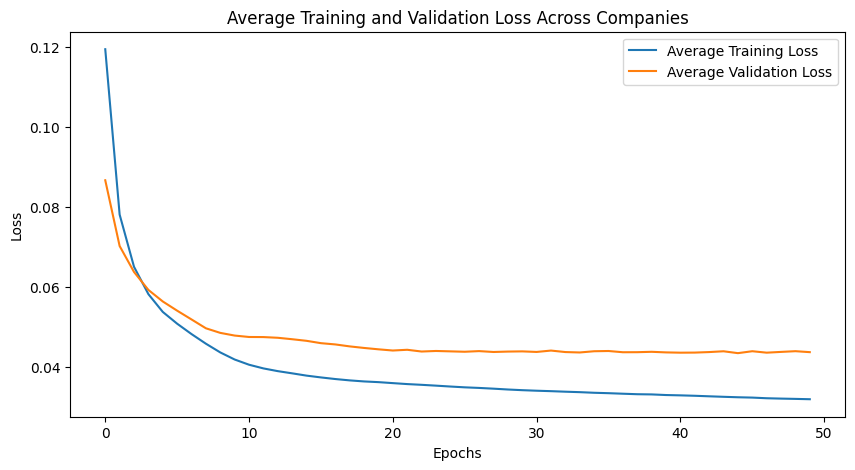

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store losses from all companies
all_training_losses = []
all_validation_losses = []

# Collect all loss histories for each company
for company, history in loss_history_dict.items():
    all_training_losses.append(history['loss'])
    all_validation_losses.append(history['val_loss'])

# Convert lists to numpy arrays for easier manipulation
all_training_losses = np.array(all_training_losses)
all_validation_losses = np.array(all_validation_losses)

# Calculate the average loss across companies for each epoch
average_training_loss = np.mean(all_training_losses, axis=0)
average_validation_loss = np.mean(all_validation_losses, axis=0)

# Plot the average training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(average_training_loss, label='Average Training Loss')
plt.plot(average_validation_loss, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Companies')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
import numpy as np

# Extract predicted closing prices for each company (assuming you have them for multiple companies)
# In this example, we'll continue with your predictions for 'ABCTRANS' as an example.

predicted_closing_prices = test_predict[:, 4]  # Assuming column 4 is the 'Close' price

# Calculate daily returns from the predicted closing prices
predicted_returns = np.diff(predicted_closing_prices) / predicted_closing_prices[:-1]

# Calculate expected return (mean of predicted returns)
expected_return = np.mean(predicted_returns)

# Calculate risk (standard deviation of predicted returns)
risk = np.std(predicted_returns)

print(f"Expected Return: {expected_return}")
print(f"Risk (Volatility): {risk}")


Expected Return: 0.029783830046653748
Risk (Volatility): 0.12487480789422989


In [2]:
# Calculate the expected return and volatility (risk) for each company
expected_returns = predicted_returns_df.mean()
risks = predicted_returns_df.std()

print("Expected Returns:")
print(expected_returns)

print("Risks (Volatility):")
print(risks)


NameError: name 'predicted_returns_df' is not defined

In [56]:
# Calculate the covariance matrix of the predicted returns
cov_matrix = predicted_returns_df.cov()

print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
              ABCTRANS      ACCESS  AFRINSURE      AFRIPRUD  AGLEVENT  \
ABCTRANS    965.231054   -1.864385  -0.154264     -0.255159 -0.150084   
ACCESS       -1.864385  312.554669   0.082161     13.753290  0.431800   
AFRINSURE    -0.154264    0.082161   1.791565     -0.284322  0.077763   
AFRIPRUD     -0.255159   13.753290  -0.284322  22732.278657 -0.574374   
AGLEVENT     -0.150084    0.431800   0.077763     -0.574374  4.562433   
...                ...         ...        ...           ...       ...   
RESORTSAL     0.114426    1.270208  -1.006746      1.786022  1.034634   
SIAMLETF40    0.236715    0.387525  -0.573804      3.884598  0.415521   
NIDF         -0.182657    0.194891  -0.158480     -0.028594  0.135039   
VFDGROUP     -0.133795    1.121354   0.641100      0.733072  0.128639   
MECURE       -0.122965    0.070236   0.077818     -8.480641  0.138820   

               AIICO  AIRSERVICE     BERGER  BETAGLAS    BOCGAS  ...  \
ABCTRANS   -2.537669    0.018388

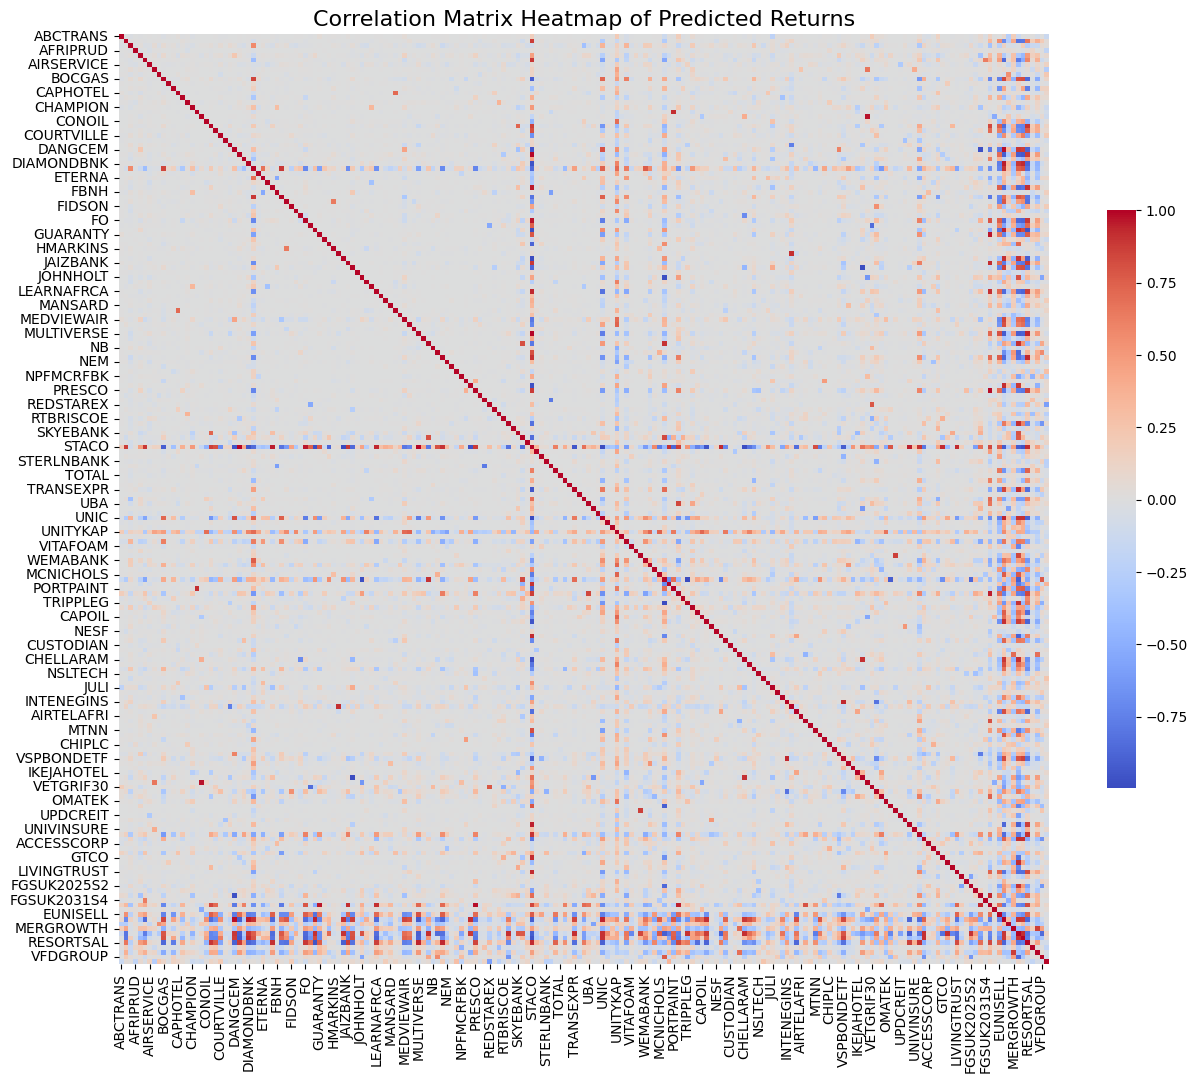

In [58]:
# Calculate the correlation matrix
correlation_matrix = predicted_returns_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .5}, annot=False)
plt.title("Correlation Matrix Heatmap of Predicted Returns", fontsize=16)
plt.show()


/Users/omotolakehinde-osems/Documents/Modern Portfolio Selection Project/myenv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


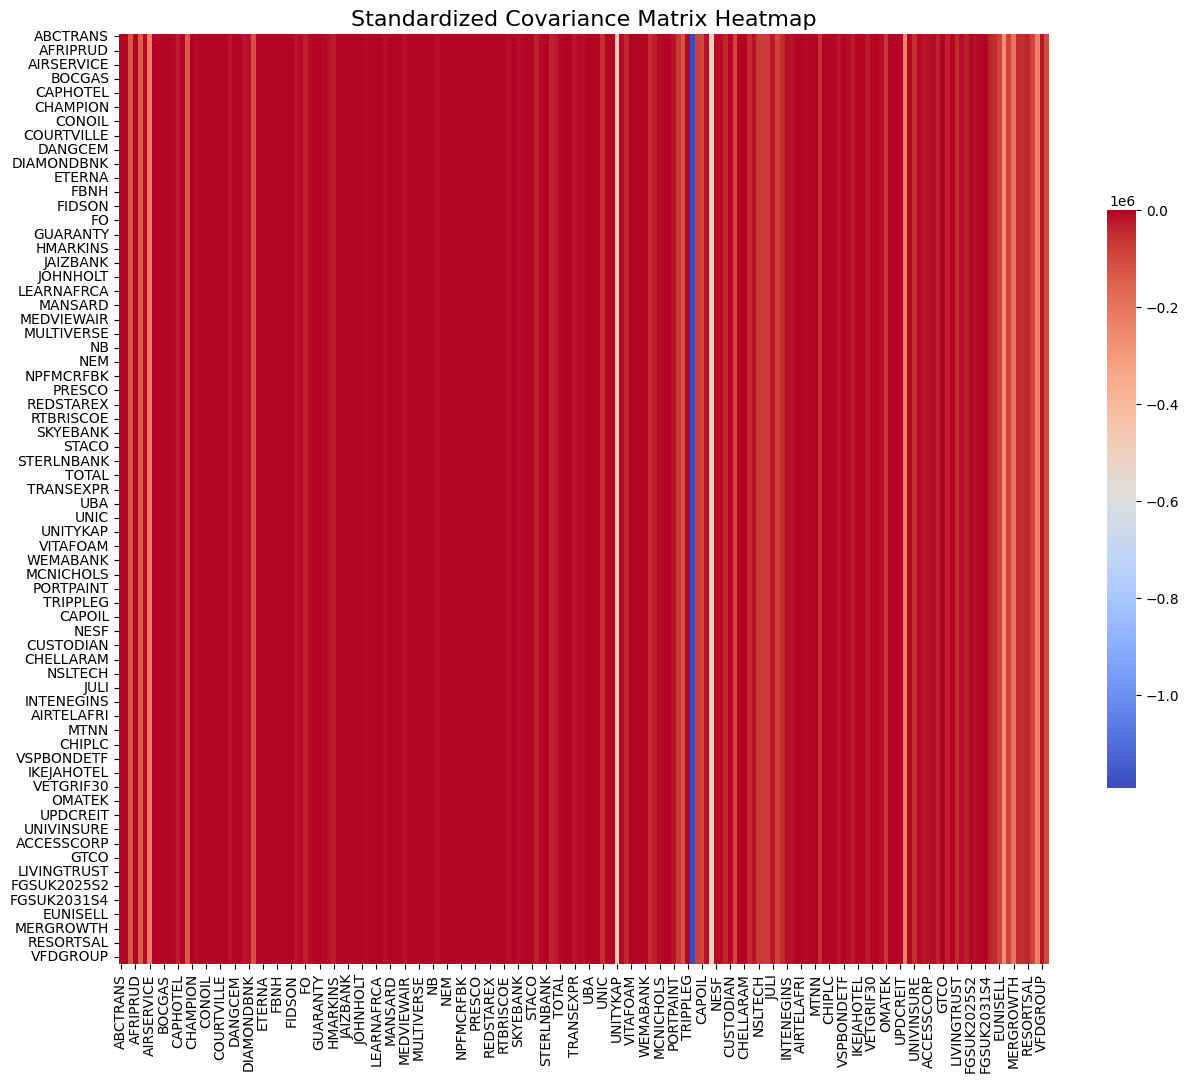

In [59]:
# Standardize the covariance matrix (z-score normalization)
standardized_cov_matrix = (cov_matrix - np.mean(cov_matrix)) / np.std(cov_matrix)

# Plot the standardized covariance matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(standardized_cov_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .5}, annot=False)
plt.title("Standardized Covariance Matrix Heatmap", fontsize=16)
plt.show()


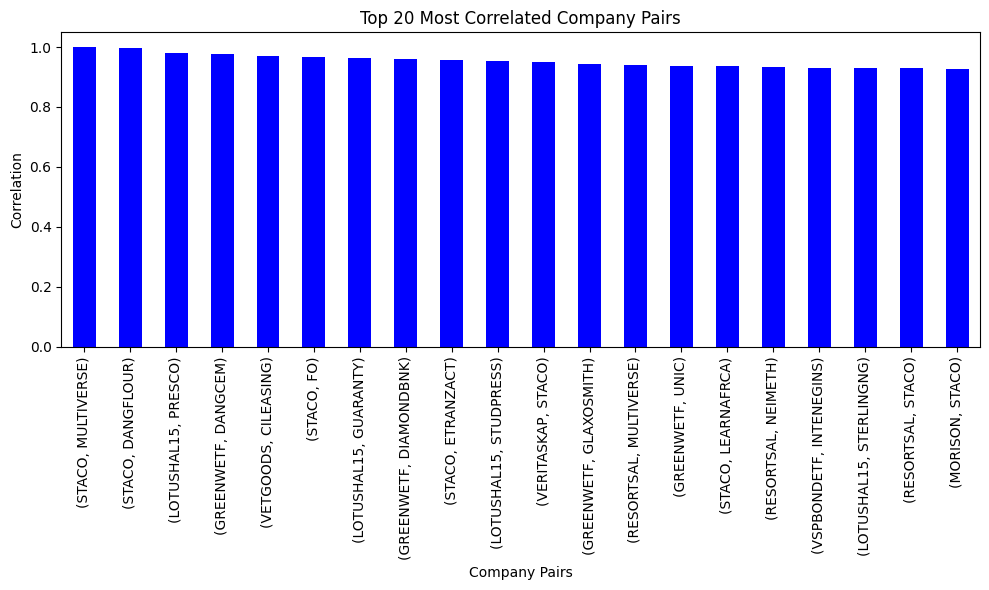

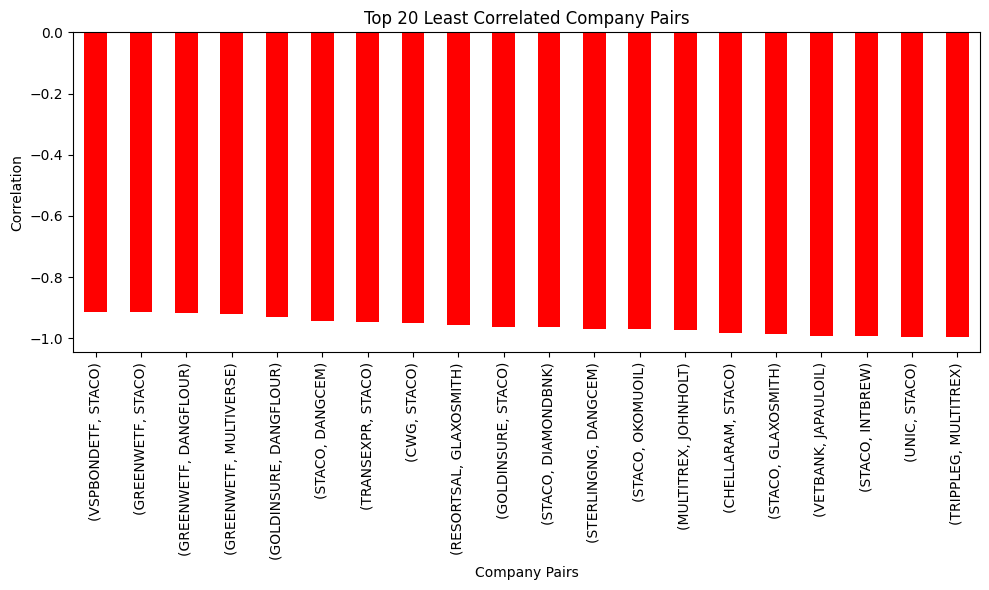

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = predicted_returns_df.corr()

# Extract the upper triangle of the correlation matrix, excluding the diagonal
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Unstack the matrix into pairs and drop NaN values
corr_pairs = corr_pairs.unstack().dropna()

# Sort the pairs by correlation values
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Top 20 most correlated pairs
top_20_most_corr = sorted_corr_pairs.head(20)

# Top 20 least correlated pairs
top_20_least_corr = sorted_corr_pairs.tail(20)

# Plotting the top 20 most correlated pairs
plt.figure(figsize=(10, 6))
top_20_most_corr.plot(kind='bar', color='blue')
plt.title("Top 20 Most Correlated Company Pairs")
plt.ylabel("Correlation")
plt.xlabel("Company Pairs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the top 20 least correlated pairs
plt.figure(figsize=(10, 6))
top_20_least_corr.plot(kind='bar', color='red')
plt.title("Top 20 Least Correlated Company Pairs")
plt.ylabel("Correlation")
plt.xlabel("Company Pairs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [62]:
import numpy as np

def portfolio_performance(weights, expected_returns, cov_matrix):
    returns = np.dot(weights, expected_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, risk


In [63]:
import scipy.optimize as sco

def minimize_risk(weights, expected_returns, cov_matrix):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]

# Initial guess: equal distribution
num_companies = len(expected_returns)
initial_guess = np.array([1/num_companies] * num_companies)

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: No short-selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(num_companies))

# Optimize portfolio to minimize risk for a given level of expected return
optimized_result = sco.minimize(minimize_risk, initial_guess, args=(expected_returns, cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

optimized_weights = optimized_result.x
optimized_return, optimized_risk = portfolio_performance(optimized_weights, expected_returns, cov_matrix)

print("Optimized Portfolio Weights:")
print(optimized_weights)

print("Optimized Portfolio Expected Return:", optimized_return)
print("Optimized Portfolio Risk (Volatility):", optimized_risk)


Optimized Portfolio Weights:
[0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614 0.00507614
 0.00507614 0.00507614 0.00507614

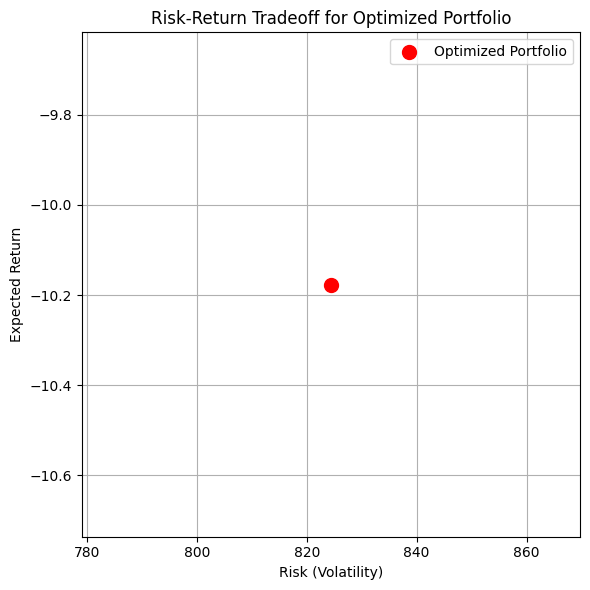

In [65]:

# 3. Risk-Return Tradeoff Plot
plt.figure(figsize=(6, 6))
plt.scatter(optimized_risk, optimized_return, color='red', label='Optimized Portfolio', s=100)
plt.title("Risk-Return Tradeoff for Optimized Portfolio")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
import numpy as np
import scipy.optimize as sco

# 1. Calculate the correlation matrix
correlation_matrix = predicted_returns_df.corr()

# 2. Extract the upper triangle of the correlation matrix (excluding the diagonal)
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 3. Unstack the matrix into pairs and drop NaN values
corr_pairs = corr_pairs.unstack().dropna()

# 4. Sort by least correlated (ascending order)
least_corr_pairs = corr_pairs.sort_values(ascending=True)

# 5. Extract the top 20 least correlated companies
# Get the unique company names from the least correlated pairs
top_20_least_corr_companies = np.unique([pair[0] for pair in least_corr_pairs.head(20).index] + [pair[1] for pair in least_corr_pairs.head(20).index])

# 6. Subset the expected returns and covariance matrix for these 20 companies
expected_returns_top20 = expected_returns[top_20_least_corr_companies]
cov_matrix_top20 = cov_matrix.loc[top_20_least_corr_companies, top_20_least_corr_companies]

# 7. Define the optimization function (minimize risk)
def minimize_risk(weights, expected_returns, cov_matrix):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]

# Initial guess: equal distribution among the 20 companies
num_top20 = len(expected_returns_top20)
initial_guess = np.array([1/num_top20] * num_top20)

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: No short-selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(num_top20))

# 8. Optimize portfolio to minimize risk for the top 20 least correlated companies
optimized_result_top20 = sco.minimize(minimize_risk, initial_guess, args=(expected_returns_top20, cov_matrix_top20),
                                      method='SLSQP', bounds=bounds, constraints=constraints)

# 9. Get the optimized weights, expected return, and risk for the top 20 companies
optimized_weights_top20 = optimized_result_top20.x
optimized_return_top20, optimized_risk_top20 = portfolio_performance(optimized_weights_top20, expected_returns_top20, cov_matrix_top20)

# Print the results for the top 20 least correlated companies
print("Optimized Portfolio Weights (Top 20 Least Correlated Companies):")
print(optimized_weights_top20)

print("Optimized Portfolio Expected Return (Top 20):", optimized_return_top20)
print("Optimized Portfolio Risk (Volatility) (Top 20):", optimized_risk_top20)


Optimized Portfolio Weights (Top 20 Least Correlated Companies):
[0.02570823 0.02570692 0.02570792 0.02571327 0.02570703 0.02570977
 0.02570684 0.0257069  0.02571453 0.46014227 0.02570841 0.0257066
 0.02571058 0.02570767 0.02570698 0.02570782 0.02570624 0.02570692
 0.02572048 0.02570688 0.02568061 0.02570713]
Optimized Portfolio Expected Return (Top 20): -0.3071812230920685
Optimized Portfolio Risk (Volatility) (Top 20): 0.042886676331088995


/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/3458421065.py:5: RuntimeWarning: invalid value encountered in sqrt
  risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))


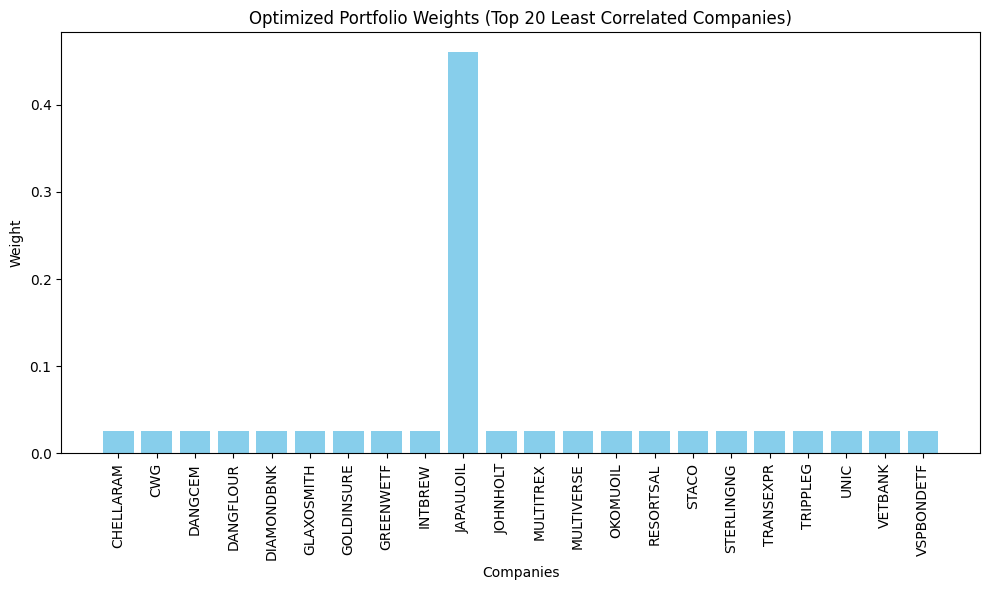

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the company names or labels for the top 20 least correlated companies
company_names_top20 = top_20_least_corr_companies

# Bar plot of optimized portfolio weights
plt.figure(figsize=(10, 6))
plt.bar(company_names_top20, optimized_weights_top20, color='skyblue')
plt.title("Optimized Portfolio Weights (Top 20 Least Correlated Companies)")
plt.ylabel("Weight")
plt.xlabel("Companies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [1]:
# Pie chart of optimized portfolio weights
plt.figure(figsize=(8, 8))
plt.pie(optimized_weights_top20, labels=company_names_top20, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Optimized Portfolio Allocation (Top 20 Least Correlated Companies)")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

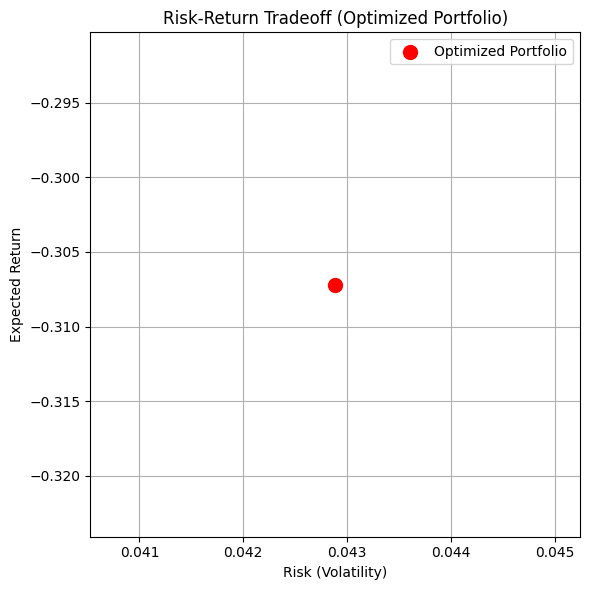

In [69]:
# Plotting the risk-return tradeoff for the optimized portfolio
plt.figure(figsize=(6, 6))
plt.scatter(optimized_risk_top20, optimized_return_top20, color='red', label='Optimized Portfolio', s=100)
plt.title("Risk-Return Tradeoff (Optimized Portfolio)")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Risk-free rate
risk_free_rate = 0.02

# 1. Equally weighted portfolio for top 20 least correlated companies
equal_weights_top20 = np.array([1/num_top20] * num_top20)  # Equal distribution among the top 20 companies

# 2. Calculate the performance of the equally weighted portfolio
equal_return_top20, equal_risk_top20 = portfolio_performance(equal_weights_top20, expected_returns_top20, cov_matrix_top20)
equal_sharpe_ratio_top20 = (equal_return_top20 - risk_free_rate) / equal_risk_top20

# 3. Calculate the Sharpe ratio for the optimized portfolio
optimized_sharpe_ratio_top20 = (optimized_return_top20 - risk_free_rate) / optimized_risk_top20

# 4. Print the results for the equally weighted portfolio
print("Equal Weight Portfolio Return (Top 20):", equal_return_top20)
print("Equal Weight Portfolio Risk (Volatility) (Top 20):", equal_risk_top20)
print("Equal Weight Portfolio Sharpe Ratio (Top 20):", equal_sharpe_ratio_top20)

# 5. Print the comparison with the optimized portfolio
print("\nOptimized Portfolio Return (Top 20):", optimized_return_top20)
print("Optimized Portfolio Risk (Volatility) (Top 20):", optimized_risk_top20)
print("Optimized Portfolio Sharpe Ratio (Top 20):", optimized_sharpe_ratio_top20)


Equal Weight Portfolio Return (Top 20): -1.2404381474480033
Equal Weight Portfolio Risk (Volatility) (Top 20): 15.796603251952925
Equal Weight Portfolio Sharpe Ratio (Top 20): -0.07979172024163968

Optimized Portfolio Return (Top 20): -0.3071812230920685
Optimized Portfolio Risk (Volatility) (Top 20): 0.042886676331088995
Optimized Portfolio Sharpe Ratio (Top 20): -7.6289713048919925


In [70]:
#ompare the optimized portfolio with an equally weighted portfolio 
risk_free_rate = 0.02
equal_weights = np.array([1/num_companies] * num_companies)
equal_return, equal_risk = portfolio_performance(equal_weights, expected_returns, cov_matrix)
equal_sharpe_ratio = (equal_return - risk_free_rate) / equal_risk

print("Equal Weight Portfolio Return:", equal_return)
print("Equal Weight Portfolio Risk:", equal_risk)
print("Equal Weight Portfolio Sharpe Ratio:", equal_sharpe_ratio)


Equal Weight Portfolio Return: -10.176683750632048
Equal Weight Portfolio Risk: 824.3938909977943
Equal Weight Portfolio Sharpe Ratio: -0.012368703676698314


In [59]:
# Assuming a risk-free rate of return (e.g., a 10-year government bond yield)
risk_free_rate = 0.02

# Calculate the Sharpe Ratio
sharpe_ratio = (optimized_return - risk_free_rate) / optimized_risk

print("Sharpe Ratio of the Optimized Portfolio:", sharpe_ratio)


Sharpe Ratio of the Optimized Portfolio: nan


## Identify the best 20 companies to invest in based on the predicted return and risk

Sharpe Ratios for Each Company:
ABCTRANS     -0.000397
ACCESS       -0.016483
AFRINSURE     0.087691
AFRIPRUD      0.010527
AGLEVENT     -0.050692
                ...   
RESORTSAL    -0.266181
SIAMLETF40    0.062888
NIDF         -0.108117
VFDGROUP     -0.049495
MECURE       -0.034255
Length: 197, dtype: float32


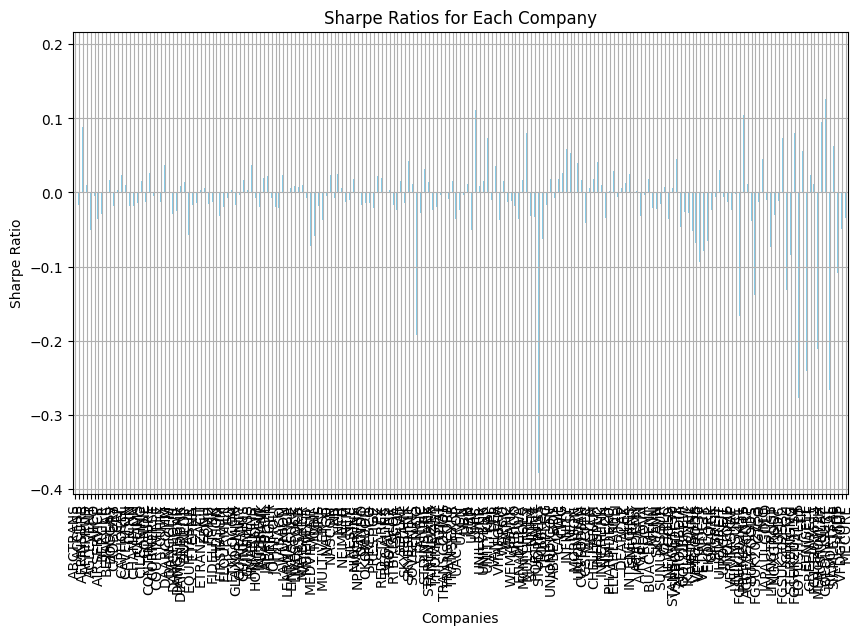

In [83]:
# Assuming a risk-free rate (you can adjust this as needed)
risk_free_rate = 0.02

# Calculate the Sharpe Ratio for each company
sharpe_ratios = (expected_returns - risk_free_rate) / risks

# Display the Sharpe Ratios
print("Sharpe Ratios for Each Company:")
print(sharpe_ratios)

# Plot the Sharpe Ratios as a bar chart
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios for Each Company')
plt.xlabel('Companies')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.grid(True)
plt.show()

In [84]:
# Rank companies by Sharpe Ratio in descending order
ranked_companies = sharpe_ratios.sort_values(ascending=False)

# Display the ranked companies
print("Ranked Companies by Sharpe Ratio:")
print(ranked_companies)



Ranked Companies by Sharpe Ratio:
SMURFIT       0.188679
GOLDINSURE    0.126265
UNIC          0.111054
PREMPAINTS    0.104749
AUSTINLAZ     0.095390
                ...   
MERGROWTH    -0.211713
EUNISELL     -0.240108
RESORTSAL    -0.266181
LOTUSHAL15   -0.277082
STUDPRESS    -0.377756
Length: 197, dtype: float32


Top 20 Companies to Invest In:
SMURFIT        0.188679
GOLDINSURE     0.126265
UNIC           0.111054
PREMPAINTS     0.104749
AUSTINLAZ      0.095390
AFRINSURE      0.087691
FGSUK2031S4    0.079723
MULTITREX      0.079634
UNITYKAP       0.072886
FGSUK2025S2    0.072885
SIAMLETF40     0.062888
INFINITY       0.058622
TIP            0.056386
NESF           0.052599
VSPBONDETF     0.044668
IMG            0.044600
SKYESHELT      0.042055
INITSPLC       0.040891
UNIONDAC       0.039403
HMARKINS       0.036883
dtype: float32


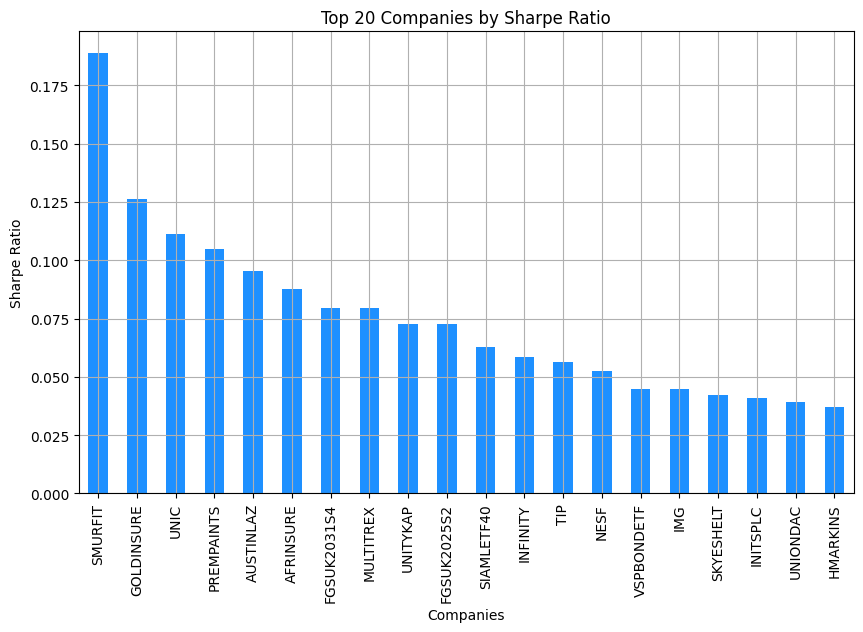

In [85]:
import matplotlib.pyplot as plt

# Select the top 20 companies
top_20_companies = ranked_companies.head(20)

# Display the top 20 companies
print("Top 20 Companies to Invest In:")
print(top_20_companies)

# Plot the top 20 Sharpe Ratios as a bar chart
plt.figure(figsize=(10, 6))
top_20_companies.plot(kind='bar', color='dodgerblue')
plt.title('Top 20 Companies by Sharpe Ratio')
plt.xlabel('Companies')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.grid(True)
plt.show()


In [86]:
# Get the expected returns and risks for the top 20 companies
top_20_expected_returns = expected_returns[top_20_companies.index]
top_20_risks = risks[top_20_companies.index]
top_20_cov_matrix = cov_matrix.loc[top_20_companies.index, top_20_companies.index]

# Create an equal weight portfolio for the top 20 companies
equal_weights_top_20 = np.array([1/20] * 20)

# Calculate portfolio performance for the top 20 companies
top_20_return, top_20_risk = portfolio_performance(equal_weights_top_20, top_20_expected_returns, top_20_cov_matrix)

# Calculate the Sharpe Ratio for the top 20 portfolio
top_20_sharpe_ratio = (top_20_return - risk_free_rate) / top_20_risk

# Display the portfolio metrics
print("Top 20 Portfolio Expected Return:", top_20_return)
print("Top 20 Portfolio Risk (Volatility):", top_20_risk)
print("Top 20 Portfolio Sharpe Ratio:", top_20_sharpe_ratio)


Top 20 Portfolio Expected Return: 1.1678796006366612
Top 20 Portfolio Risk (Volatility): 7.170134767172681
Top 20 Portfolio Sharpe Ratio: 0.16009177482856318


Equal-Weighted Portfolio:
Expected Return: 1.1678796006366612
Risk (Volatility): 7.170134767172681
Sharpe Ratio: 0.16009177482856318

Optimized Portfolio (Minimized Risk):
Expected Return: 0.06179457477324812
Risk (Volatility): 0.25819085419717114
Sharpe Ratio: 0.16187472985131804


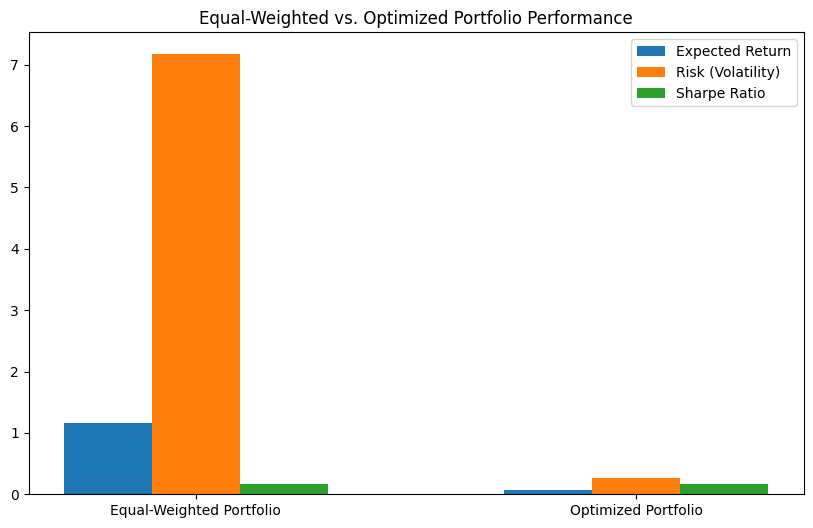

In [87]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

# Function to calculate portfolio performance (returns, risk/volatility)
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)  # Weighted return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
    return portfolio_return, portfolio_volatility

# Assuming risk-free rate is defined
risk_free_rate = 0.02

# Function to minimize portfolio risk (used for optimization)
def minimize_risk(weights, expected_returns, cov_matrix):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]  # Return only volatility (risk)

# 1. Equal-Weighted Portfolio
num_stocks = len(top_20_expected_returns)  # Number of stocks in the top 20 companies
equal_weights = np.array([1/num_stocks] * num_stocks)  # Equal weights for each company

# Calculate equal-weighted portfolio performance
equal_return, equal_risk = portfolio_performance(equal_weights, top_20_expected_returns, top_20_cov_matrix)
equal_sharpe_ratio = (equal_return - risk_free_rate) / equal_risk

print("Equal-Weighted Portfolio:")
print("Expected Return:", equal_return)
print("Risk (Volatility):", equal_risk)
print("Sharpe Ratio:", equal_sharpe_ratio)

# 2. Optimized Portfolio (Minimize Risk)
# Initial guess for weights
initial_guess = np.array([1/num_stocks] * num_stocks)

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: No short-selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(num_stocks))

# Optimize portfolio to minimize risk (volatility)
optimized_result = sco.minimize(minimize_risk, initial_guess, args=(top_20_expected_returns, top_20_cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

# Optimized weights
optimized_weights = optimized_result.x

# Calculate optimized portfolio performance
optimized_return, optimized_risk = portfolio_performance(optimized_weights, top_20_expected_returns, top_20_cov_matrix)
optimized_sharpe_ratio = (optimized_return - risk_free_rate) / optimized_risk

print("\nOptimized Portfolio (Minimized Risk):")
print("Expected Return:", optimized_return)
print("Risk (Volatility):", optimized_risk)
print("Sharpe Ratio:", optimized_sharpe_ratio)

# Plot the comparison between equal-weighted and optimized portfolio
labels = ['Equal-Weighted Portfolio', 'Optimized Portfolio']
returns = [equal_return, optimized_return]
risks = [equal_risk, optimized_risk]
sharpe_ratios = [equal_sharpe_ratio, optimized_sharpe_ratio]

x = np.arange(len(labels))  # Label locations

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, returns, 0.2, label='Expected Return')
plt.bar(x, risks, 0.2, label='Risk (Volatility)')
plt.bar(x + 0.2, sharpe_ratios, 0.2, label='Sharpe Ratio')
plt.xticks(x, labels)
plt.title('Equal-Weighted vs. Optimized Portfolio Performance')
plt.legend()
plt.show()


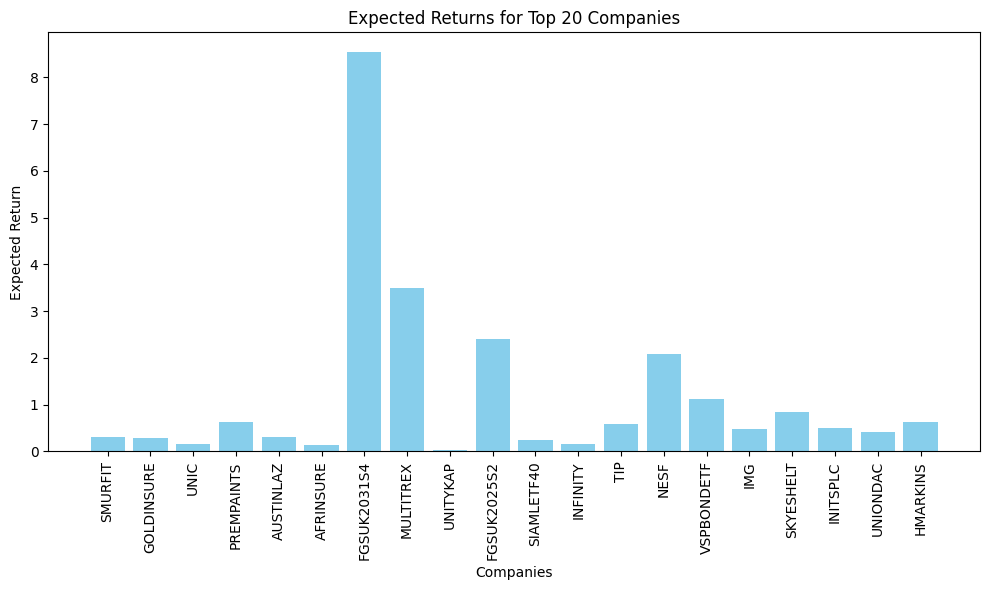

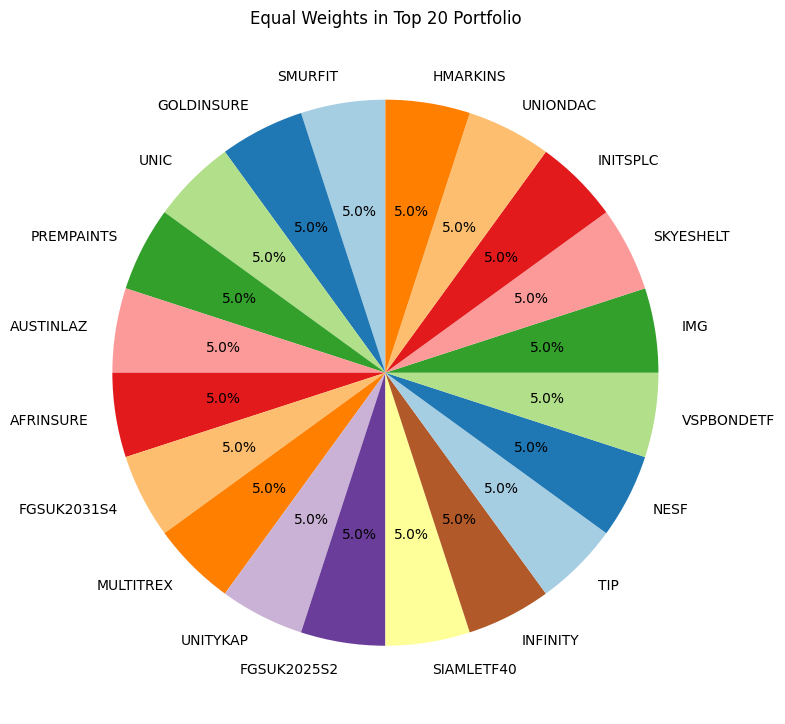

/var/folders/70/v9tj_t9j3vg188xynxfynyw80000gn/T/ipykernel_40831/523307818.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (top_20_risks[i], top_20_expected_returns[i]), fontsize=8)


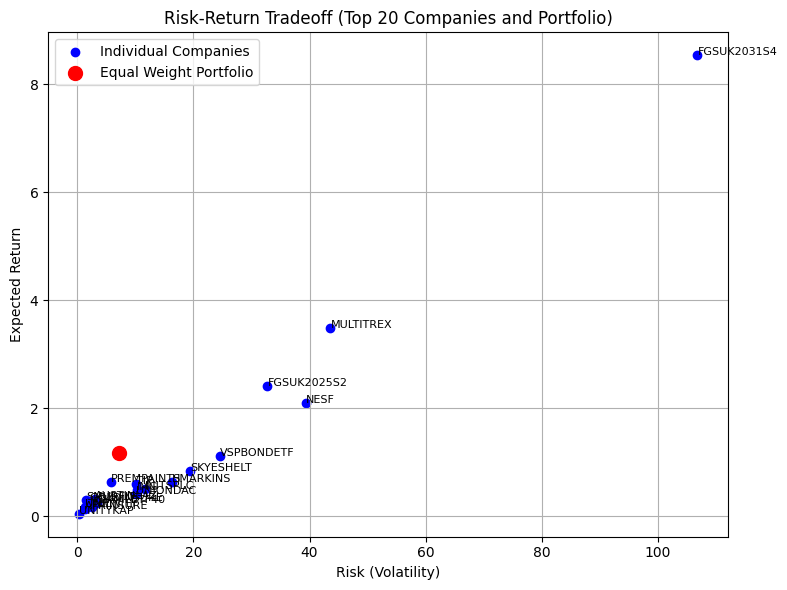

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list or index of company names for the top 20 companies
top_20_company_names = top_20_companies.index

### 1. Bar Plot of Expected Returns for Top 20 Companies
plt.figure(figsize=(10, 6))
plt.bar(top_20_company_names, top_20_expected_returns, color='skyblue')
plt.title("Expected Returns for Top 20 Companies")
plt.ylabel("Expected Return")
plt.xlabel("Companies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2. Pie Chart of Equal Weights in the Top 20 Portfolio
plt.figure(figsize=(8, 8))
plt.pie(equal_weights_top_20, labels=top_20_company_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Equal Weights in Top 20 Portfolio")
plt.tight_layout()
plt.show()

### 3. Risk-Return Tradeoff Plot (Top 20 Companies and Portfolio)
plt.figure(figsize=(8, 6))

# Plot the individual companies' risk-return tradeoff
plt.scatter(top_20_risks, top_20_expected_returns, color='blue', label='Individual Companies')

# Annotate each company on the scatter plot
for i, txt in enumerate(top_20_company_names):
    plt.annotate(txt, (top_20_risks[i], top_20_expected_returns[i]), fontsize=8)

# Plot the portfolio risk-return point
plt.scatter(top_20_risk, top_20_return, color='red', label='Equal Weight Portfolio', s=100)

# Set plot labels and title
plt.title("Risk-Return Tradeoff (Top 20 Companies and Portfolio)")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

# Function to calculate portfolio performance (returns, risk/volatility)
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)  # Weighted return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
    return portfolio_return, portfolio_volatility

# Assuming risk-free rate is defined
risk_free_rate = 0.02

# Function to minimize portfolio risk (used for optimization)
def minimize_risk(weights, expected_returns, cov_matrix):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]  # Return only volatility (risk)

# 1. Equal-Weighted Portfolio
num_stocks = len(top_20_expected_returns)  # Number of stocks in the top 20 companies
equal_weights = np.array([1/num_stocks] * num_stocks)  # Equal weights for each company

# Calculate equal-weighted portfolio performance
equal_return, equal_risk = portfolio_performance(equal_weights, top_20_expected_returns, top_20_cov_matrix)
equal_sharpe_ratio = (equal_return - risk_free_rate) / equal_risk

# 2. Optimized Portfolio (Minimize Risk)
# Initial guess for weights
initial_guess = np.array([1/num_stocks] * num_stocks)

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: No short-selling, so weights between 0 and 1
bounds = tuple((0, 1) for _ in range(num_stocks))

# Optimize portfolio to minimize risk (volatility)
optimized_result = sco.minimize(minimize_risk, initial_guess, args=(top_20_expected_returns, top_20_cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

# Optimized weights
optimized_weights = optimized_result.x

# Calculate optimized portfolio performance
optimized_return, optimized_risk = portfolio_performance(optimized_weights, top_20_expected_returns, top_20_cov_matrix)
optimized_sharpe_ratio = (optimized_return - risk_free_rate) / optimized_risk

# Print the results
print("\nOptimized Portfolio Weights:")
print(optimized_weights)
print("Optimized Portfolio Expected Return:", optimized_return)
print("Optimized Portfolio Risk (Volatility):", optimized_risk)
print("Optimized Portfolio Sharpe Ratio:", optimized_sharpe_ratio)

# List of top 20 company names (assuming you have them in 'top_20_companies' or 'top_20_company_names')
top_20_company_names = top_20_expected_returns.index

# Plot the optimized portfolio weights as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_company_names, optimized_weights, color='lightblue')
plt.title('Optimized Portfolio Weights (Top 20 Companies)')
plt.xlabel('Companies')
plt.ylabel('Weight')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the optimized portfolio allocation as a pie chart with adjusted font size
plt.figure(figsize=(27, 27))
plt.pie(optimized_weights, labels=top_20_company_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,
        textprops={'fontsize': 6})  # Adjusting font size to 8
plt.title('Optimized Portfolio Allocation (Top 20 Companies)')
plt.tight_layout()
plt.show()


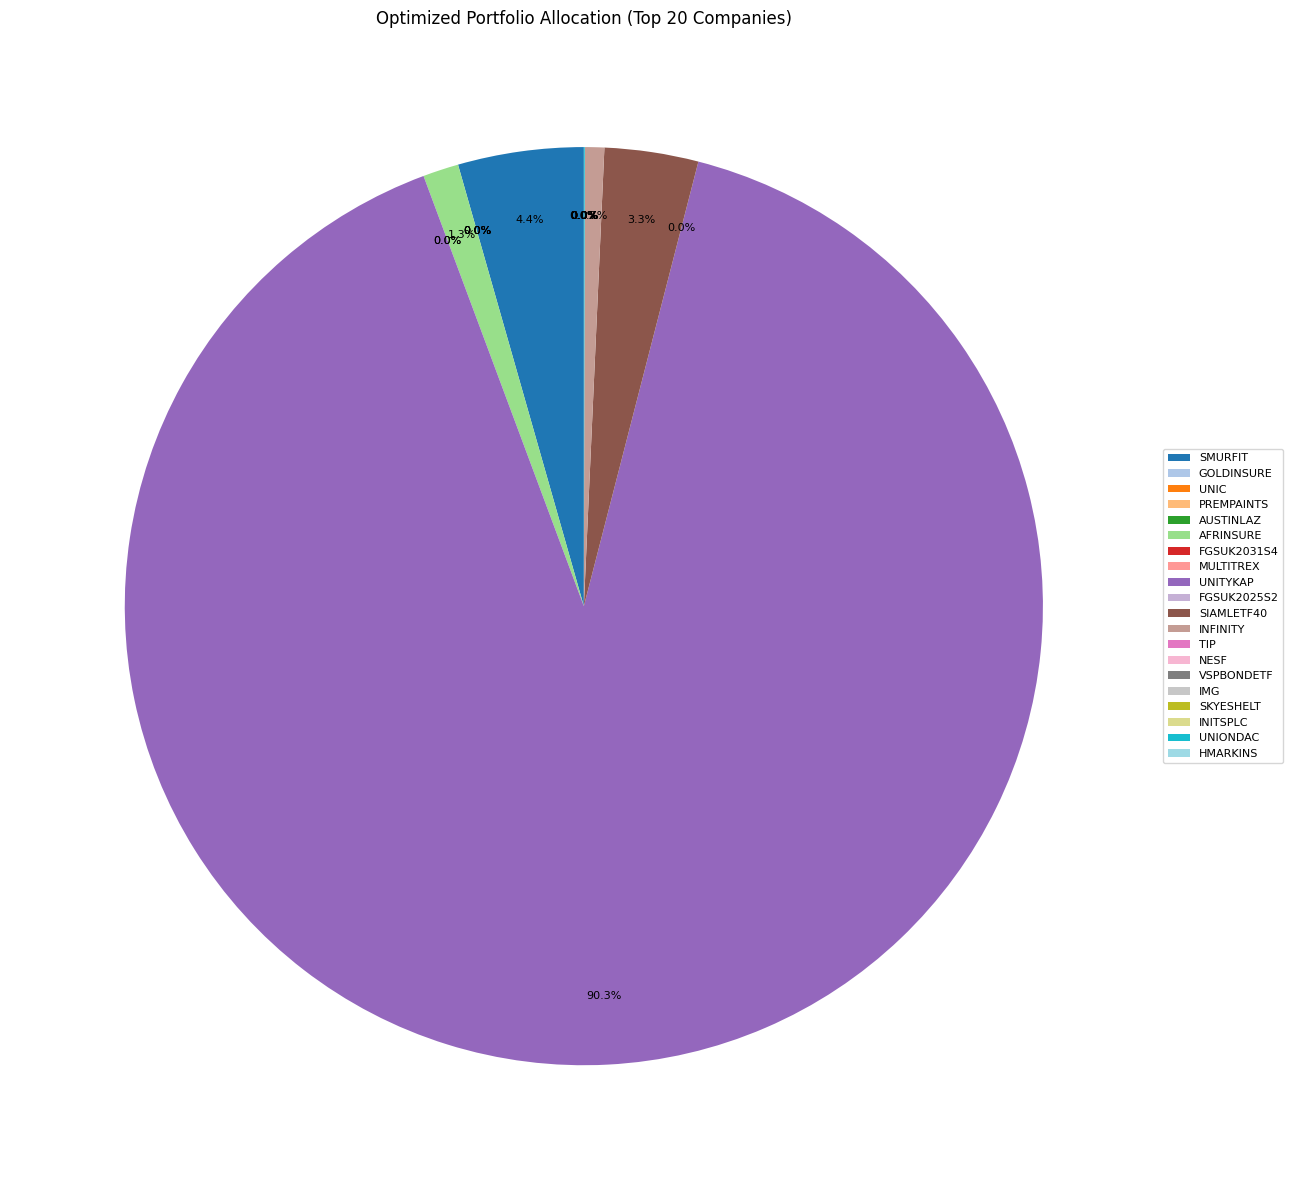

In [106]:
# Plot the optimized portfolio allocation as a pie chart with adjusted labels
plt.figure(figsize=(13, 13))

# Reduce label size, adjust labeldistance and pctdistance to avoid overlapping
plt.pie(optimized_weights, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, 
        labeldistance=1.05, pctdistance=0.85, textprops={'fontsize': 8})

# Add a legend with the company names outside the pie chart
plt.legend(top_20_company_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# Title and layout adjustments
plt.title('Optimized Portfolio Allocation (Top 20 Companies)')
plt.tight_layout()
plt.show()


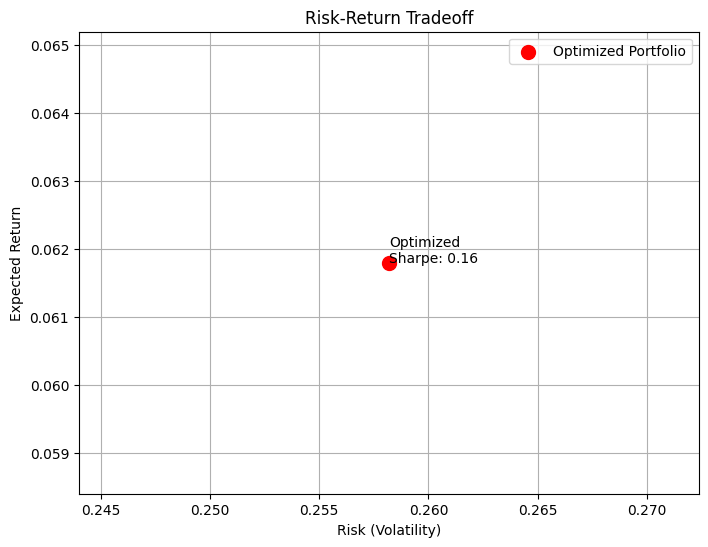

In [108]:

plt.figure(figsize=(8, 6))


# Plot for Optimized Portfolio
plt.scatter(optimized_risk, optimized_return, color='red', label='Optimized Portfolio', s=100)
plt.text(optimized_risk, optimized_return, f'Optimized\nSharpe: {round((optimized_return - risk_free_rate) / optimized_risk, 2)}', fontsize=10)

# Plot formatting
plt.title('Risk-Return Tradeoff')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()
plt.show()


Understanding the Portfolio Metrics:
Top 20 Portfolio Expected Return: 0.0643:

This represents the expected return of the portfolio, which is approximately 6.43%. However, to determine whether this is good, we need to consider the time period over which this return is expected.
Top 20 Portfolio Risk (Volatility): 0.2831:

This is the standard deviation of the portfolio's returns, indicating the portfolio's risk. A volatility of 28.31% is relatively high, meaning the portfolio's returns could fluctuate significantly.
Top 20 Portfolio Sharpe Ratio: 0.1565:

The Sharpe Ratio of 0.1565 is positive, but it's relatively low. The Sharpe Ratio indicates the risk-adjusted return of the portfolio. Generally, a Sharpe Ratio above 1 is considered good, above 2 is very good, and above 3 is excellent. A Sharpe Ratio below 1 suggests that the returns are not very high relative to the risk taken.
Time Frame for Expected Return:
The expected return you calculated (6.43%) depends on the time frame used in the LSTM model predictions which is 20 days. so 6.43% would be the expected return in 20 days.

## Stock Data Only